# **Tesla Stock Price Prediction using Deep Learning**
## **SimpleRNN and LSTM Models Comparison**

### **Contribution: AKSHAY SOM**
---

**Project Overview:**
- **Objective:** Predict Tesla stock prices using historical data with deep learning models
- **Models:** SimpleRNN and LSTM
- **Prediction Horizons:** 1-day, 5-day, and 10-day forecasts
- **Target Variable:** Adjusted Close Price
- **Domain:** Financial Services

**Skills Demonstrated:**
- Data Cleaning & Preprocessing
- Exploratory Data Analysis (EDA)
- Data Visualization
- Feature Engineering
- Deep Learning (SimpleRNN & LSTM)
- Hyperparameter Tuning
- Model Evaluation & Comparison

## **1. Setup and Installation**

First, let's install and import all necessary libraries.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Uninstall existing packages to ensure a clean installation
!pip uninstall scikit-learn -y
!pip uninstall scikeras -y

# Install scikeras and let it manage its scikit-learn dependency
!pip install scikeras

# Machine Learning and Deep Learning libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# The KerasRegressor wrapper has moved to scikeras library
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
import sklearn # Import sklearn to check its version

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Configure plotting
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

print(f"TensorFlow Version: {tf.__version__}")
print(f"Pandas Version: {pd.__version__}")
print(f"NumPy Version: {np.__version__}")
print(f"Scikit-learn Version: {sklearn.__version__}") # Print scikit-learn version
print("\n✅ All libraries imported successfully!")

Found existing installation: scikit-learn 1.8.0
Uninstalling scikit-learn-1.8.0:
  Successfully uninstalled scikit-learn-1.8.0
Found existing installation: scikeras 0.13.0
Uninstalling scikeras-0.13.0:
  Successfully uninstalled scikeras-0.13.0
  Using cached scikeras-0.13.0-py3-none-any.whl.metadata (3.1 kB)
  Using cached scikit_learn-1.8.0-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (11 kB)
Using cached scikeras-0.13.0-py3-none-any.whl (26 kB)
Using cached scikit_learn-1.8.0-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (8.9 MB)
TensorFlow Version: 2.19.0
Pandas Version: 2.2.2
NumPy Version: 2.0.2
Scikit-learn Version: 1.8.0

✅ All libraries imported successfully!


## **2. Data Loading and Initial Exploration**

Load the Tesla stock price dataset and perform initial exploration.

In [2]:
# Upload the CSV file
from google.colab import files
print("Please upload the TSLA.csv file:")
uploaded = files.upload()

Please upload the TSLA.csv file:


Saving TSLA.csv to TSLA (1).csv


In [3]:
# Load the dataset
df = pd.read_csv('TSLA.csv')

print("Dataset Shape:", df.shape)
print("\n" + "="*80)
print("First 5 rows:")
print("="*80)
df.head()

Dataset Shape: (2416, 7)

First 5 rows:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:
# Display dataset information
print("\n" + "="*80)
print("Dataset Information:")
print("="*80)
df.info()

print("\n" + "="*80)
print("Statistical Summary:")
print("="*80)
df.describe()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.3+ KB

Statistical Summary:


,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [5]:

print("\n" + "="*80)
print("MISSING VALUE ANALYSIS AND HANDLING STRATEGY")
print("="*80)

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values in Dataset:")
print(missing_values)
print(f"\nTotal Missing Values: {missing_values.sum()}")

if missing_values.sum() == 0:
    print("\n✅ No missing values found in the dataset!")
    print("\nHowever, here's how we would handle missing values in time-series data:")
    print("\n1. FORWARD FILL (Preferred for Stock Prices):")
    print("   - Carries last known value forward")
    print("   - Best for sequential data where values don't change drastically")
    print("   - Example: df.fillna(method='ffill')")

    print("\n2. BACKWARD FILL:")
    print("   - Uses next known value")
    print("   - Useful for end-of-series gaps")
    print("   - Example: df.fillna(method='bfill')")

    print("\n3. INTERPOLATION:")
    print("   - Linear interpolation between known values")
    print("   - Good for smooth trends")
    print("   - Example: df.interpolate(method='linear')")

    print("\n4. AVOID for Time-Series:")
    print("   -  Mean/Median imputation (breaks temporal dependencies)")
    print("   -  Dropping rows (creates gaps in sequences)")

    print("\n5. TIME-SPECIFIC CONSIDERATIONS:")
    print("   - Missing weekends/holidays: Keep as-is (markets closed)")
    print("   - Missing trading days: Use forward fill")
    print("   - Long gaps: Consider external data sources")

    print("\n6. IMPACT ON MODEL TRAINING:")
    print("   - Sequential models (RNN/LSTM) require complete sequences")
    print("   - Missing values break temporal continuity")
    print("   - Must handle before creating training sequences")
else:
    print(f"\n Found {missing_values.sum()} missing values!")
    print("\nApplying Forward Fill (most appropriate for time-series):")
    df = df.fillna(method='ffill')
    print("✅ Missing values handled!")

print("="*80)


MISSING VALUE ANALYSIS AND HANDLING STRATEGY

Missing Values in Dataset:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Total Missing Values: 0

✅ No missing values found in the dataset!

However, here's how we would handle missing values in time-series data:

1. FORWARD FILL (Preferred for Stock Prices):
   - Carries last known value forward
   - Best for sequential data where values don't change drastically
   - Example: df.fillna(method='ffill')

2. BACKWARD FILL:
   - Uses next known value
   - Useful for end-of-series gaps
   - Example: df.fillna(method='bfill')

3. INTERPOLATION:
   - Linear interpolation between known values
   - Good for smooth trends
   - Example: df.interpolate(method='linear')

4. AVOID for Time-Series:
   -  Mean/Median imputation (breaks temporal dependencies)
   -  Dropping rows (creates gaps in sequences)

5. TIME-SPECIFIC CONSIDERATIONS:
   - Missing weekends/holidays: Keep as-is (

### **Missing Value Handling Strategy**

For time-series financial data, we must be careful with missing value treatment:

**Why Forward Fill?**
- Stock prices are sequential and temporally dependent
- Last known price is best estimate for missing data
- Preserves temporal patterns that RNN/LSTM models need

**What to Avoid:**
- Mean/median imputation destroys temporal dependencies
- Dropping rows creates gaps that break sequence continuity
- Random imputation introduces noise in sequential patterns

**Special Cases:**
- Weekends/holidays: Markets closed, not truly "missing"
- Trading halts: Use forward fill from last trading price
- Data gaps > 5 days: Investigate data source issues

In [6]:
# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

print("\n" + "="*80)
print("Date Range:")
print("="*80)
print(f"Start Date: {df.index.min().strftime('%Y-%m-%d')}")
print(f"End Date: {df.index.max().strftime('%Y-%m-%d')}")
print(f"Total Trading Days: {len(df)}")
print(f"Duration: {(df.index.max() - df.index.min()).days} days")


Date Range:
Start Date: 2010-06-29
End Date: 2020-02-03
Total Trading Days: 2416
Duration: 3506 days


## **3. Exploratory Data Analysis (EDA)**

Visualize and analyze the stock price trends and patterns.

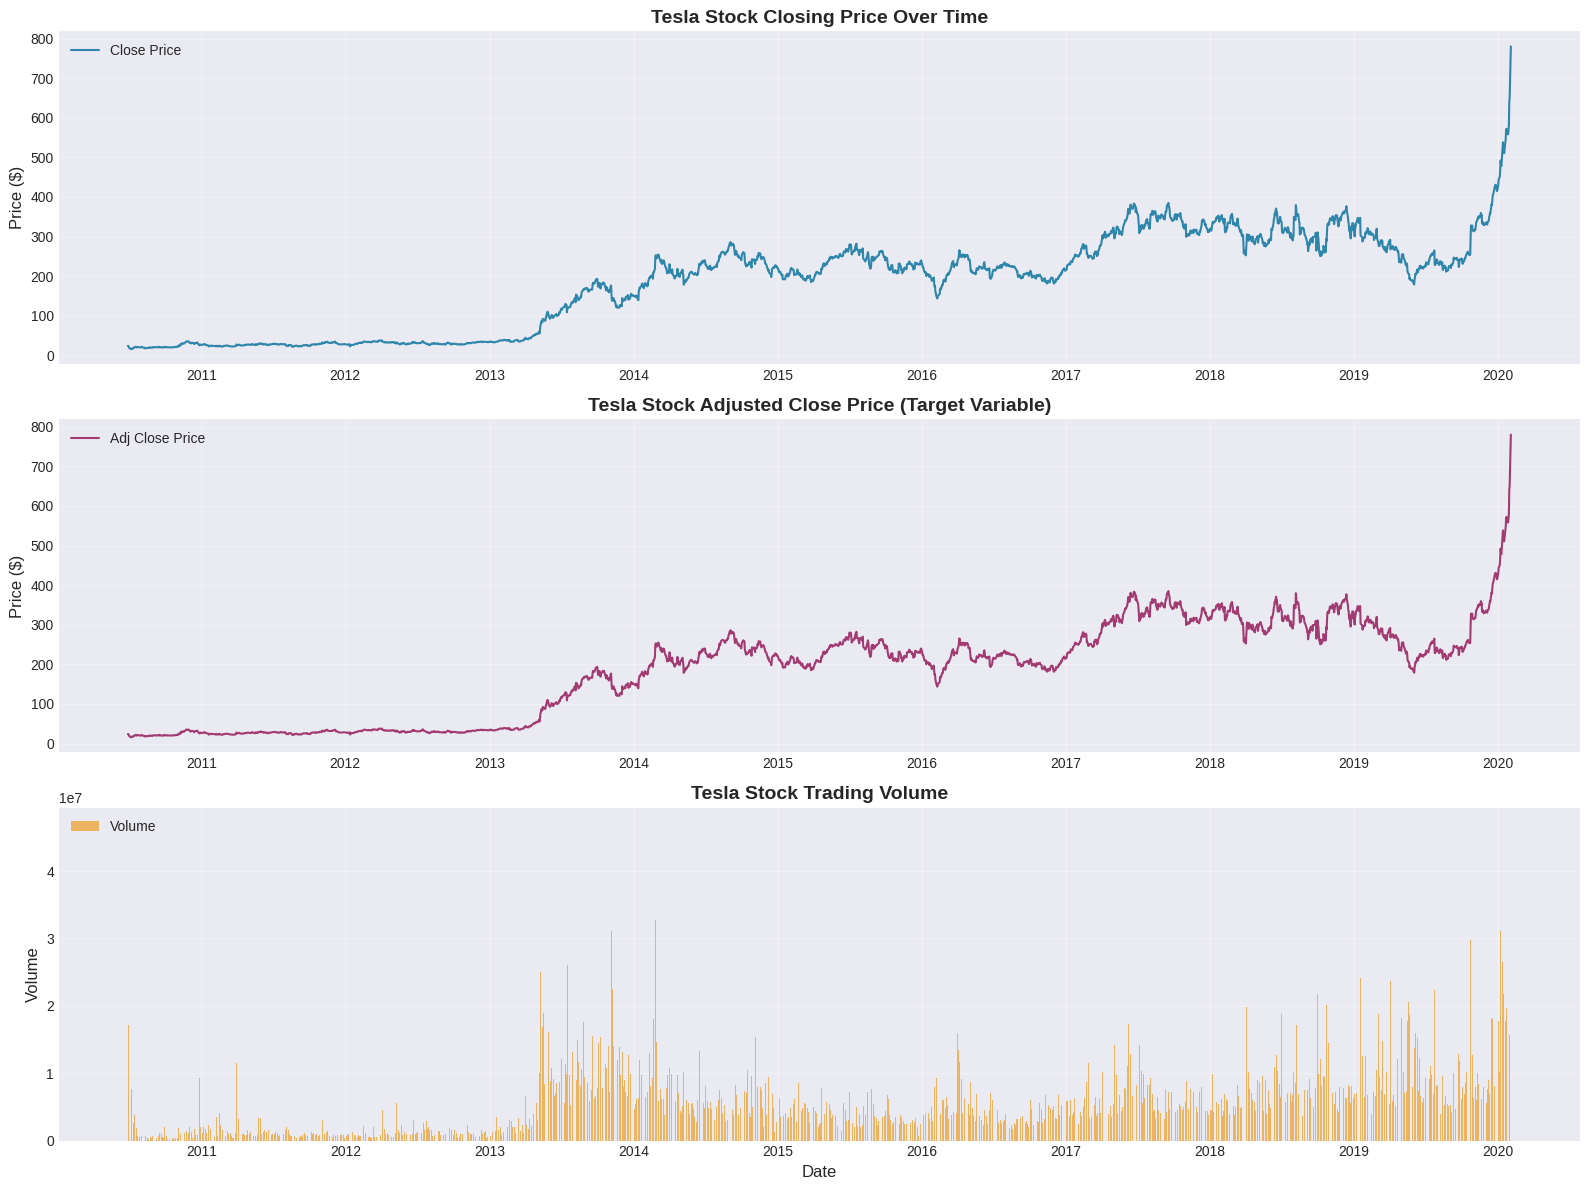

In [7]:
# Plot 1: Complete Stock Price History
fig, axes = plt.subplots(3, 1, figsize=(16, 12))

# Closing Price
axes[0].plot(df.index, df['Close'], color='#2E86AB', linewidth=1.5, label='Close Price')
axes[0].set_title('Tesla Stock Closing Price Over Time', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Price ($)', fontsize=12)
axes[0].legend(loc='upper left')
axes[0].grid(True, alpha=0.3)

# Adjusted Close Price (Our Target)
axes[1].plot(df.index, df['Adj Close'], color='#A23B72', linewidth=1.5, label='Adj Close Price')
axes[1].set_title('Tesla Stock Adjusted Close Price (Target Variable)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Price ($)', fontsize=12)
axes[1].legend(loc='upper left')
axes[1].grid(True, alpha=0.3)

# Trading Volume
axes[2].bar(df.index, df['Volume'], color='#F18F01', alpha=0.6, label='Volume')
axes[2].set_title('Tesla Stock Trading Volume', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Date', fontsize=12)
axes[2].set_ylabel('Volume', fontsize=12)
axes[2].legend(loc='upper left')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

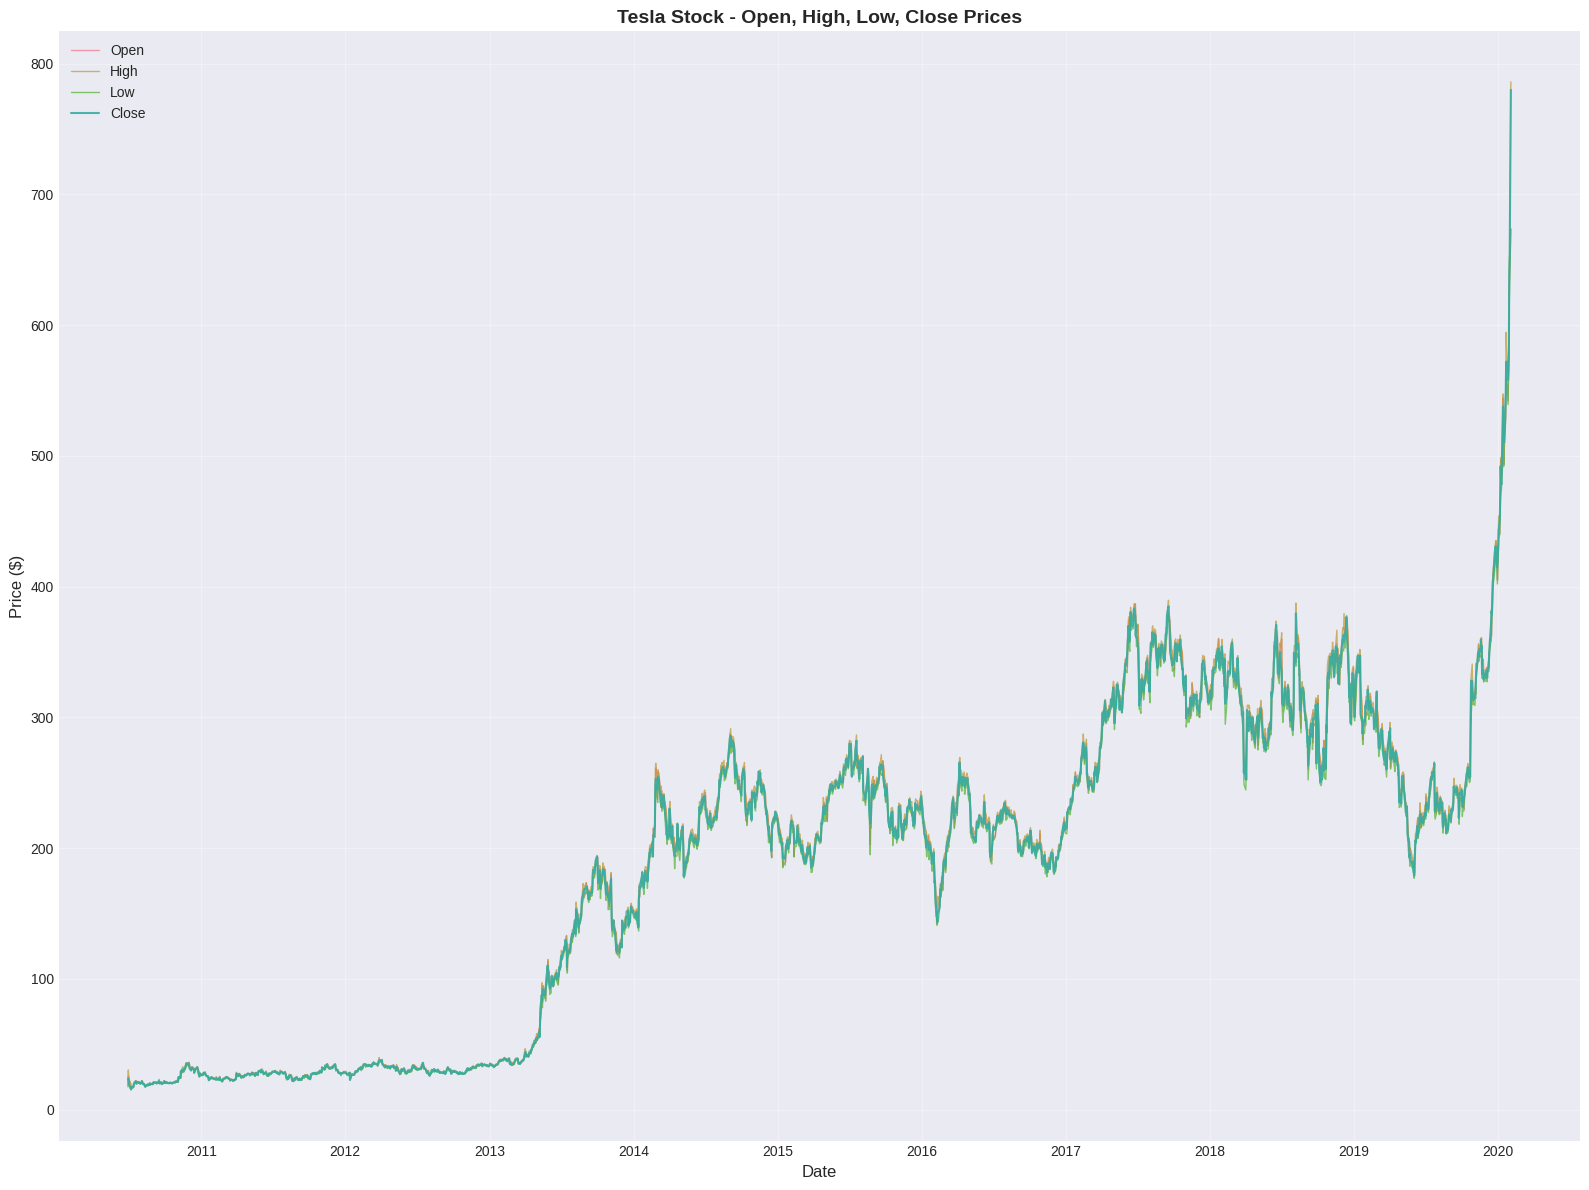

In [8]:
# Plot 2: OHLC Analysis
fig, ax = plt.subplots(figsize=(16, 12))

ax.plot(df.index, df['Open'], label='Open', alpha=0.7, linewidth=1)
ax.plot(df.index, df['High'], label='High', alpha=0.7, linewidth=1)
ax.plot(df.index, df['Low'], label='Low', alpha=0.7, linewidth=1)
ax.plot(df.index, df['Close'], label='Close', alpha=0.9, linewidth=1.5)

ax.set_title('Tesla Stock - Open, High, Low, Close Prices', fontsize=14, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Price ($)', fontsize=12)
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

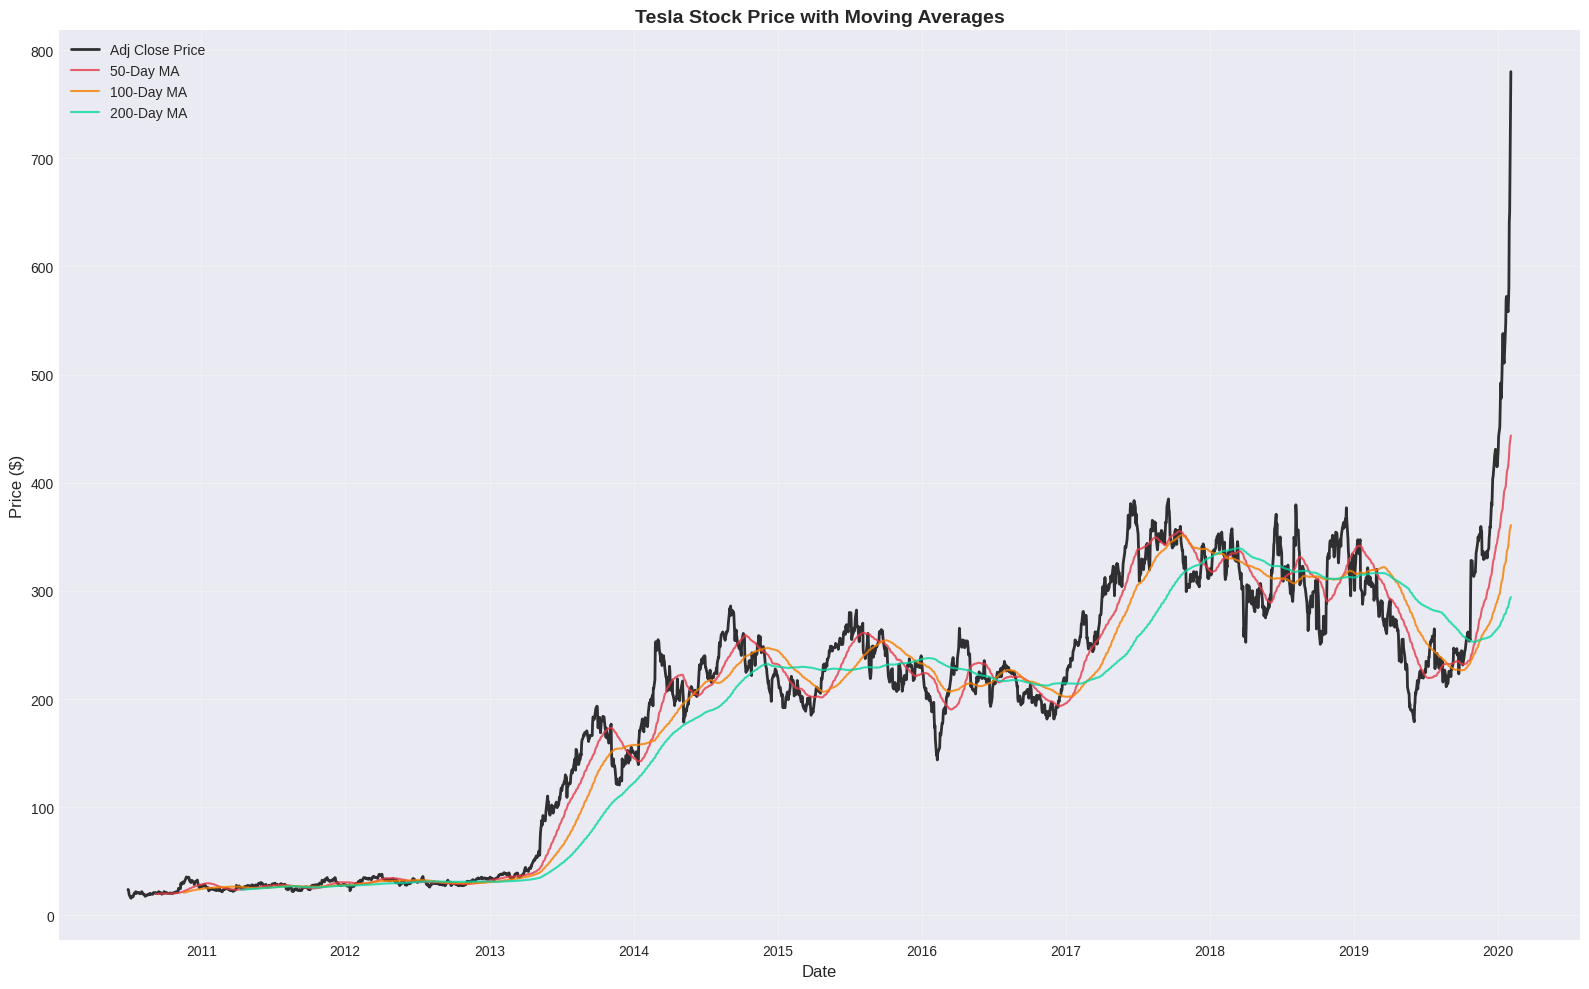

In [9]:
# Plot 3: Moving Averages
fig, ax = plt.subplots(figsize=(16, 10))

# Calculate moving averages
df['MA_50'] = df['Adj Close'].rolling(window=50).mean()
df['MA_100'] = df['Adj Close'].rolling(window=100).mean()
df['MA_200'] = df['Adj Close'].rolling(window=200).mean()

ax.plot(df.index, df['Adj Close'], label='Adj Close Price', color='black', linewidth=2, alpha=0.8)
ax.plot(df.index, df['MA_50'], label='50-Day MA', color='#E63946', linewidth=1.5, alpha=0.8)
ax.plot(df.index, df['MA_100'], label='100-Day MA', color='#F77F00', linewidth=1.5, alpha=0.8)
ax.plot(df.index, df['MA_200'], label='200-Day MA', color='#06D6A0', linewidth=1.5, alpha=0.8)

ax.set_title('Tesla Stock Price with Moving Averages', fontsize=14, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Price ($)', fontsize=12)
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

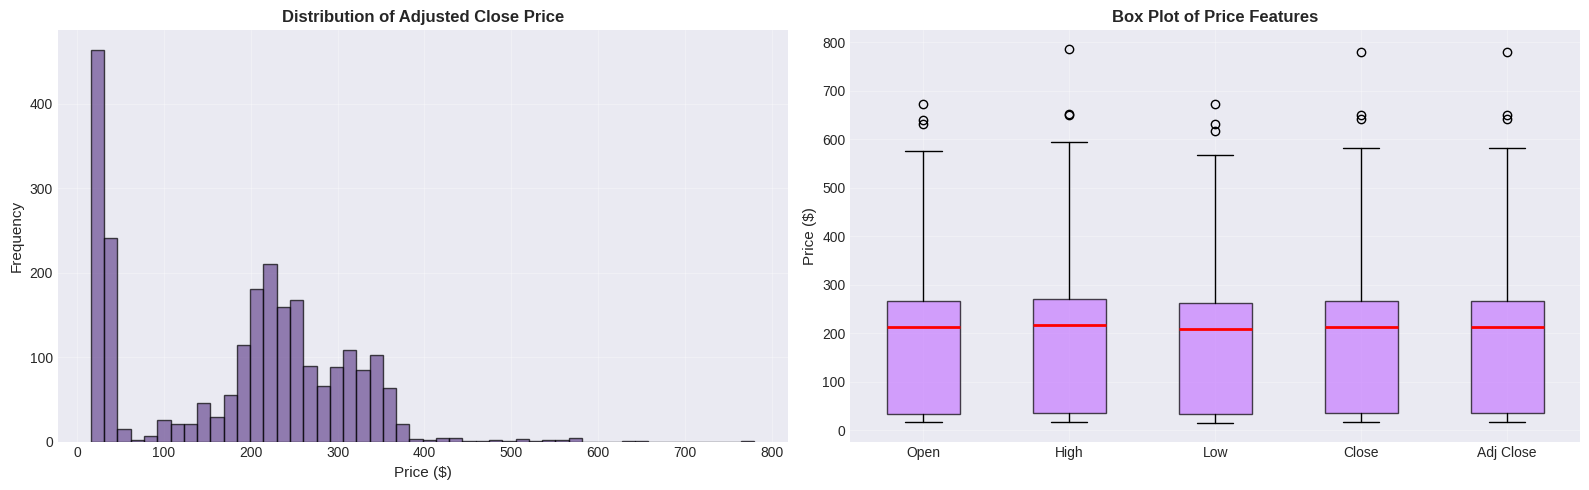

In [10]:
# Plot 4: Distribution Analysis
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Histogram
axes[0].hist(df['Adj Close'], bins=50, color='#6A4C93', alpha=0.7, edgecolor='black')
axes[0].set_title('Distribution of Adjusted Close Price', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Price ($)', fontsize=11)
axes[0].set_ylabel('Frequency', fontsize=11)
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot([df['Open'], df['High'], df['Low'], df['Close'], df['Adj Close']],
                labels=['Open', 'High', 'Low', 'Close', 'Adj Close'],
                patch_artist=True,
                boxprops=dict(facecolor='#C77DFF', alpha=0.7),
                medianprops=dict(color='red', linewidth=2))
axes[1].set_title('Box Plot of Price Features', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Price ($)', fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

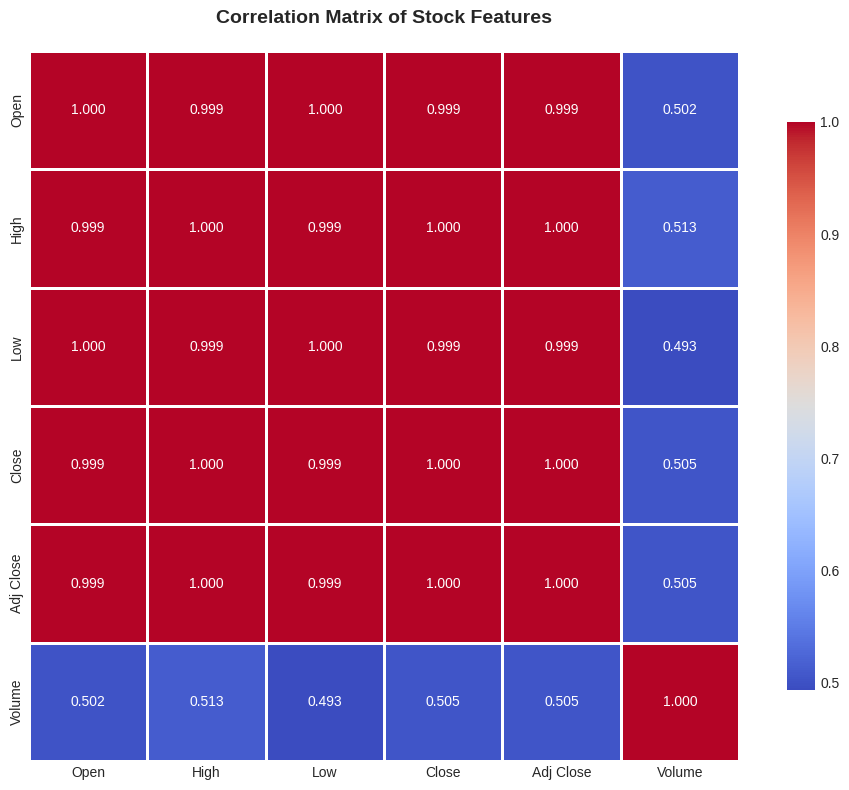


Key Observations from Correlation Analysis:
-> High correlation between Open, High, Low, Close, and Adj Close prices
-> Volume shows relatively lower correlation with price features
-> Close and Adj Close are almost perfectly correlated


In [11]:
# Plot 5: Correlation Heatmap
fig, ax = plt.subplots(figsize=(10, 8))

# Calculate correlation matrix
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm',
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Correlation Matrix of Stock Features', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("Key Observations from Correlation Analysis:")
print("="*80)
print("-> High correlation between Open, High, Low, Close, and Adj Close prices")
print("-> Volume shows relatively lower correlation with price features")
print("-> Close and Adj Close are almost perfectly correlated")

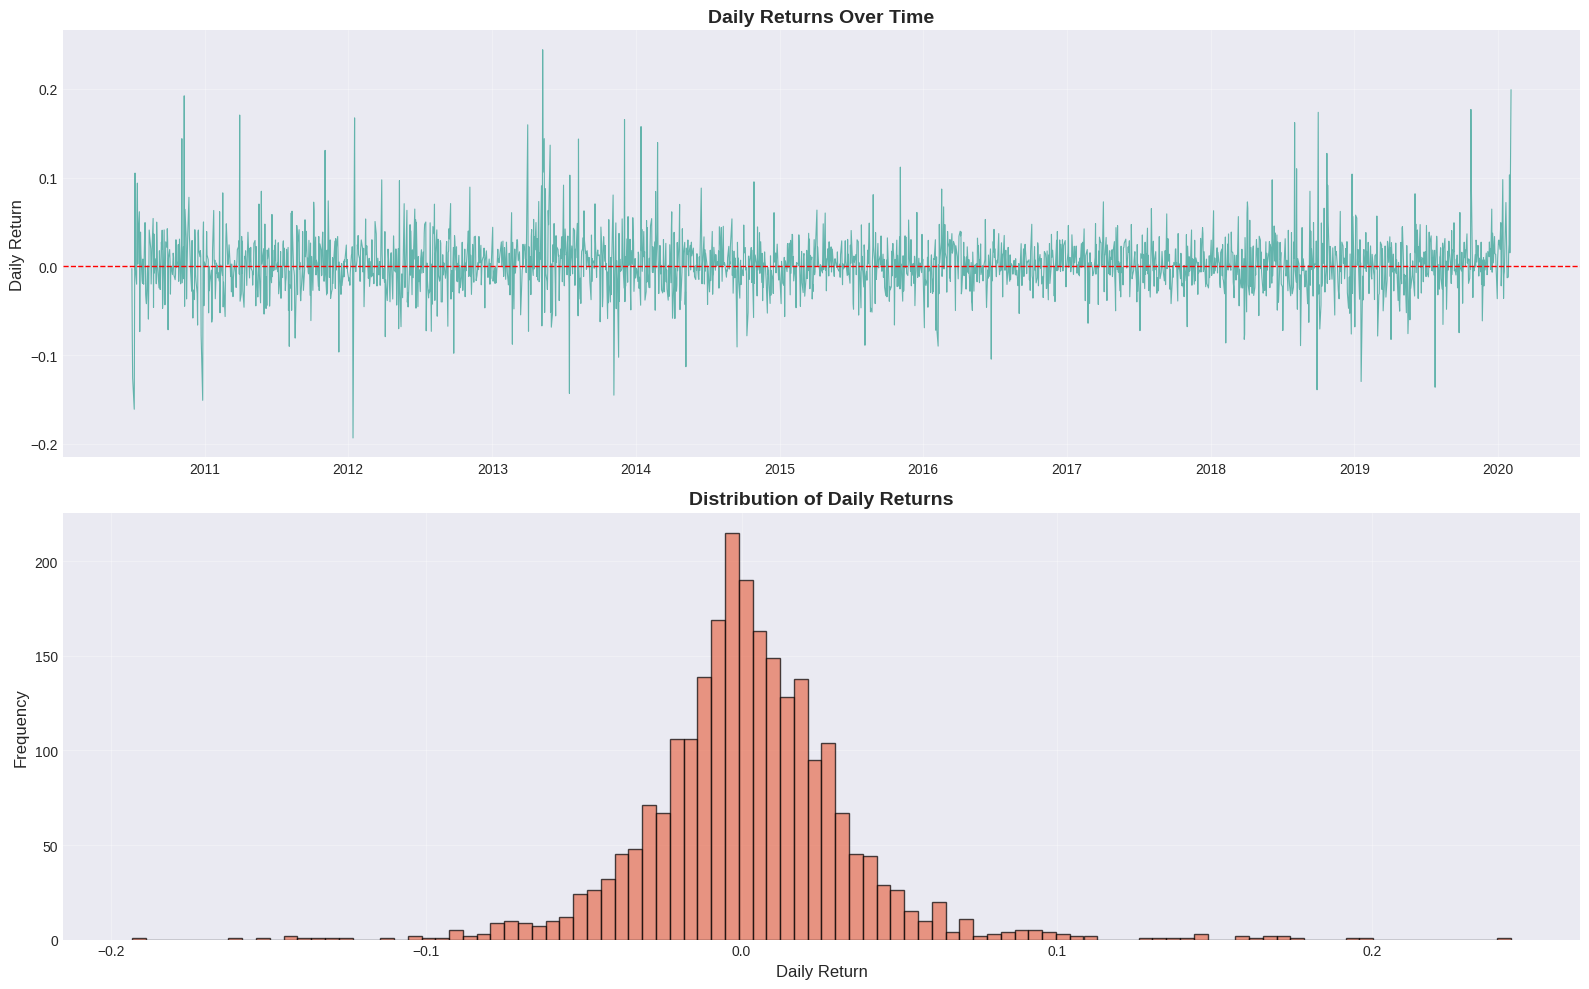


Daily Returns Statistics:
Mean: 0.0020
Std Dev: 0.0328
Min: -0.1933
Max: 0.2440


In [12]:
# Daily Returns Analysis
df['Daily_Return'] = df['Adj Close'].pct_change()

fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Daily returns over time
axes[0].plot(df.index, df['Daily_Return'], color='#2A9D8F', linewidth=0.8, alpha=0.7)
axes[0].axhline(y=0, color='red', linestyle='--', linewidth=1)
axes[0].set_title('Daily Returns Over Time', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Daily Return', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Distribution of daily returns
axes[1].hist(df['Daily_Return'].dropna(), bins=100, color='#E76F51', alpha=0.7, edgecolor='black')
axes[1].set_title('Distribution of Daily Returns', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Daily Return', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nDaily Returns Statistics:")
print(f"Mean: {df['Daily_Return'].mean():.4f}")
print(f"Std Dev: {df['Daily_Return'].std():.4f}")
print(f"Min: {df['Daily_Return'].min():.4f}")
print(f"Max: {df['Daily_Return'].max():.4f}")

## **4. Data Preprocessing**

Prepare the data for model training by handling missing values, scaling, and creating sequences.

In [13]:
# Handle missing values if any
# For time-series data, forward fill is appropriate as it uses the last known value
if df.isnull().sum().sum() > 0:
    print("Handling missing values using forward fill method...")
    df.fillna(method='ffill', inplace=True)
    # If any remaining NaN at the beginning, use backward fill
    df.fillna(method='bfill', inplace=True)
    print(f"-> Missing values handled. Current null count: {df.isnull().sum().sum()}")
else:
    print(" No missing values to handle!")

Handling missing values using forward fill method...
-> Missing values handled. Current null count: 0


In [14]:
# Select target variable (Adj Close)
data = df[['Adj Close']].values

print(f"Target Variable Shape: {data.shape}")
print(f"Total data points: {len(data)}")
print(f"\nFirst 5 values:\n{data[:5]}")

Target Variable Shape: (2416, 1)
Total data points: 2416

First 5 values:
[[23.889999]
 [23.83    ]
 [21.959999]
 [19.200001]
 [16.110001]]


In [15]:
# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

print("Data Scaling:")
print(f"Original range: [{data.min():.2f}, {data.max():.2f}]")
print(f"Scaled range: [{scaled_data.min():.2f}, {scaled_data.max():.2f}]")
print("\n-> Data normalized using MinMaxScaler!")

Data Scaling:
Original range: [15.80, 780.00]
Scaled range: [0.00, 1.00]

-> Data normalized using MinMaxScaler!


In [16]:
# Create sequences function
def create_sequences(data, time_steps=60):
    """
    Create sequences for time-series prediction.

    Args:
        data: Scaled data array
        time_steps: Number of previous time steps to use for prediction

    Returns:
        X: Input sequences
        y: Target values
    """
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, 0])
        y.append(data[i, 0])

    X, y = np.array(X), np.array(y)
    # Reshape X for RNN input [samples, time steps, features]
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    return X, y

# Create sequences with 60 time steps (approximately 2-3 months of trading days)
TIME_STEPS = 60
X, y = create_sequences(scaled_data, TIME_STEPS)

print("Sequence Creation:")
print(f"Time steps used: {TIME_STEPS} days")
print(f"X shape: {X.shape} (samples, time_steps, features)")
print(f"y shape: {y.shape}")
print(f"\nTotal sequences created: {len(X)}")

Sequence Creation:
Time steps used: 60 days
X shape: (2356, 60, 1) (samples, time_steps, features)
y shape: (2356,)

Total sequences created: 2356


In [17]:
# Split data into training and testing sets (80-20 split)
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print("Train-Test Split:")
print(f"Split Ratio: {split_ratio*100}% train, {(1-split_ratio)*100}% test")
print(f"\nTraining Set:")
print(f"  X_train shape: {X_train.shape}")
print(f"  y_train shape: {y_train.shape}")
print(f"  Samples: {len(X_train)}")
print(f"\nTest Set:")
print(f"  X_test shape: {X_test.shape}")
print(f"  y_test shape: {y_test.shape}")
print(f"  Samples: {len(X_test)}")
print("\n-> Data preprocessing completed!")

Train-Test Split:
Split Ratio: 80.0% train, 19.999999999999996% test

Training Set:
  X_train shape: (1884, 60, 1)
  y_train shape: (1884,)
  Samples: 1884

Test Set:
  X_test shape: (472, 60, 1)
  y_test shape: (472,)
  Samples: 472

-> Data preprocessing completed!


## **5. Model 1: SimpleRNN Implementation**

Build and train a SimpleRNN model for stock price prediction.

In [18]:
# Build SimpleRNN model
def build_simple_rnn(units=30, dropout_rate=0.2, learning_rate=0.001):
    """
    Build SimpleRNN model architecture.

    Args:
        units: Number of RNN units
        dropout_rate: Dropout rate for regularization
        learning_rate: Learning rate for optimizer

    Returns:
        Compiled SimpleRNN model
    """
    model = Sequential([
        SimpleRNN(units=units, return_sequences=True, input_shape=(TIME_STEPS, 1)),
        Dropout(dropout_rate),
        SimpleRNN(units=units, return_sequences=True),
        Dropout(dropout_rate),
        SimpleRNN(units=units),
        Dropout(dropout_rate),
        Dense(units=25, activation='relu'),
        Dense(units=1)
    ])

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

    return model

# Create SimpleRNN model
simple_rnn_model = build_simple_rnn(units=30, dropout_rate=0.2, learning_rate=0.001)

print("SimpleRNN Model Architecture:")
print("="*80)
simple_rnn_model.summary()

SimpleRNN Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 60, 30)         │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 30)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 60, 30)         │         1,830 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 30)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 30)             │         1,830 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │           775 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,421 (21.18 KB)

 Trainable params: 5,421 (21.18 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

checkpoint = ModelCheckpoint(
    'simple_rnn_best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

print("Callbacks configured:")
print("-> Early Stopping (patience=15)")
print("-> Model Checkpoint (save best model)")

Callbacks configured:
-> Early Stopping (patience=15)
-> Model Checkpoint (save best model)


In [20]:
# Train SimpleRNN model
print("\n" + "="*80)
print("Training SimpleRNN Model...")
print("="*80 + "\n")

history_rnn = simple_rnn_model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=50,
    validation_split=0.1,
    callbacks=[early_stopping, checkpoint],
    verbose=1
)

print("\n-> SimpleRNN model training completed!")


Training SimpleRNN Model...

Epoch 1/50
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1189 - mae: 0.2414
Epoch 1: val_loss improved from inf to 0.02602, saving model to simple_rnn_best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.1166 - mae: 0.2385 - val_loss: 0.0260 - val_mae: 0.1589
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0102 - mae: 0.0794
Epoch 2: val_loss did not improve from 0.02602
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0102 - mae: 0.0792 - val_loss: 0.0285 - val_mae: 0.1670
Epoch 3/50
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0056 - mae: 0.0573
Epoch 3: val_loss improved from 0.02602 to 0.02263, saving model to simple_rnn_best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0056 - mae: 0.0572 - val_loss: 0.0226 - val_mae: 0.1484
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0044 - mae: 0.0480
Epoch 4: val_loss improved from 0.02263 to 0.02109, saving model to simple_rnn_best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0044 - mae: 0.0480 - val_loss: 0.0211 - val_mae: 0.1433
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0032 - mae: 0.0410
Epoch 5: val_loss improved from 0.02109 to 0.01185, saving model to simple_rnn_best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 0.0032 - mae: 0.0410 - val_loss: 0.0118 - val_mae: 0.1064
Epoch 6/50
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0026 - mae: 0.0370
Epoch 6: val_loss did not improve from 0.01185
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0026 - mae: 0.0370 - val_loss: 0.0121 - val_mae: 0.1076
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0021 - mae: 0.0340
Epoch 7: val_loss did not improve from 0.01185
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0021 - mae: 0.0340 - val_loss: 0.0123 - val_mae: 0.1088
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0023 - mae: 0.0328
Epoch 8: val_loss improved from 0.01185 to 0.00885, saving model to simple_rnn_best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0023 - mae: 0.0328 - val_loss: 0.0089 - val_mae: 0.0915
Epoch 9/50
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0017 - mae: 0.0295
Epoch 9: val_loss improved from 0.00885 to 0.00822, saving model to simple_rnn_best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0017 - mae: 0.0295 - val_loss: 0.0082 - val_mae: 0.0881
Epoch 10/50
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0019 - mae: 0.0295
Epoch 10: val_loss did not improve from 0.00822
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0019 - mae: 0.0295 - val_loss: 0.0109 - val_mae: 0.1022
Epoch 11/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0017 - mae: 0.0277
Epoch 11: val_loss did not improve from 0.00822
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0017 - mae: 0.0277 - val_loss: 0.0098 - val_mae: 0.0968
Epoch 12/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0016 - mae: 0.0262
Epoch 12: val_loss improved from 0.00822 to 0.00737, saving model to simple_rnn_best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 0.0016 - mae: 0.0262 - val_loss: 0.0074 - val_mae: 0.0833
Epoch 13/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0015 - mae: 0.0268
Epoch 13: val_loss did not improve from 0.00737
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0015 - mae: 0.0268 - val_loss: 0.0104 - val_mae: 0.0997
Epoch 14/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0014 - mae: 0.0247
Epoch 14: val_loss did not improve from 0.00737
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0014 - mae: 0.0247 - val_loss: 0.0091 - val_mae: 0.0929
Epoch 15/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0012 - mae: 0.0232
Epoch 15: val_loss did not improve from 0.00737
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0012 - mae: 0.0232 - val_loss: 0.0079 - val_mae: 0.0866
Epoch 16/50
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0013 - mae: 0.0241
Epoch 16: val_loss improved from 0.00737 to 0.00556, saving model to simple_rnn_best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0013 - mae: 0.0241 - val_loss: 0.0056 - val_mae: 0.0717
Epoch 17/50
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0011 - mae: 0.0229
Epoch 17: val_loss improved from 0.00556 to 0.00549, saving model to simple_rnn_best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0011 - mae: 0.0229 - val_loss: 0.0055 - val_mae: 0.0712
Epoch 18/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0010 - mae: 0.0218
Epoch 18: val_loss did not improve from 0.00549
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0010 - mae: 0.0217 - val_loss: 0.0062 - val_mae: 0.0758
Epoch 19/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0010 - mae: 0.0212
Epoch 19: val_loss did not improve from 0.00549
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0010 - mae: 0.0212 - val_loss: 0.0066 - val_mae: 0.0786
Epoch 20/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 9.9824e-04 - mae: 0.0214
Epoch 20: val_loss improved from 0.00549 to 0.00547, saving model to simple_rnn_best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 9.9728e-04 - mae: 0.0214 - val_loss: 0.0055 - val_mae: 0.0712
Epoch 21/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 9.7030e-04 - mae: 0.0206
Epoch 21: val_loss improved from 0.00547 to 0.00453, saving model to simple_rnn_best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 9.7173e-04 - mae: 0.0206 - val_loss: 0.0045 - val_mae: 0.0643
Epoch 22/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 9.6675e-04 - mae: 0.0216
Epoch 22: val_loss did not improve from 0.00453
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 9.6631e-04 - mae: 0.0216 - val_loss: 0.0049 - val_mae: 0.0668
Epoch 23/50
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 8.3953e-04 - mae: 0.0201
Epoch 23: val_loss did not improve from 0.00453
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 8.3965e-04 - mae: 0.0201 - val_loss: 0.0054 - val_mae: 0.0705
Epoch 24/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 9.7125e-04 - mae: 0.0204
Epoch 24: val_loss did not improve from 0.00453
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 9.7037e-04 - mae: 0.0204 - val_loss: 0.0062 - val_mae: 0.0761
Epoch 25/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 8.2376e-04 - mae: 0.0198
Epoch 25: val_loss did not improve from 0.00453
53/53 ━━━━━━━━━━━━━━━━━━━━ 3

53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 9.0385e-04 - mae: 0.0198 - val_loss: 0.0043 - val_mae: 0.0627
Epoch 27/50
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 8.3116e-04 - mae: 0.0195
Epoch 27: val_loss did not improve from 0.00431
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 8.3000e-04 - mae: 0.0195 - val_loss: 0.0056 - val_mae: 0.0725
Epoch 28/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 7.5366e-04 - mae: 0.0184
Epoch 28: val_loss did not improve from 0.00431
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 7.5396e-04 - mae: 0.0184 - val_loss: 0.0059 - val_mae: 0.0747
Epoch 29/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 8.3753e-04 - mae: 0.0196
Epoch 29: val_loss did not improve from 0.00431
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 8.3643e-04 - mae: 0.0196 - val_loss: 0.0050 - val_mae: 0.0679
Epoch 30/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 6.8567e-04 - mae: 0.0182
Epoch 30: val_loss did not improve from 0.00431
53/53 ━━━━━━━━━━━━━━━━━━━━ 2

53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 7.2213e-04 - mae: 0.0186 - val_loss: 0.0038 - val_mae: 0.0587
Epoch 35/50
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 7.5812e-04 - mae: 0.0190
Epoch 35: val_loss did not improve from 0.00380
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 7.5634e-04 - mae: 0.0189 - val_loss: 0.0044 - val_mae: 0.0639
Epoch 36/50
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 6.3421e-04 - mae: 0.0167
Epoch 36: val_loss did not improve from 0.00380
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 6.3509e-04 - mae: 0.0168 - val_loss: 0.0056 - val_mae: 0.0723
Epoch 37/50
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 7.2600e-04 - mae: 0.0185
Epoch 37: val_loss did not improve from 0.00380
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 7.2550e-04 - mae: 0.0185 - val_loss: 0.0041 - val_mae: 0.0609
Epoch 38/50
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 6.2969e-04 - mae: 0.0175
Epoch 38: val_loss did not improve from 0.00380
53/53 ━━━━━━━━━━━━━━━━━━━━ 2

53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 6.2586e-04 - mae: 0.0179 - val_loss: 0.0037 - val_mae: 0.0579
Epoch 43/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 6.6387e-04 - mae: 0.0181
Epoch 43: val_loss did not improve from 0.00369
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 6.6348e-04 - mae: 0.0181 - val_loss: 0.0061 - val_mae: 0.0760
Epoch 44/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 5.7511e-04 - mae: 0.0170
Epoch 44: val_loss did not improve from 0.00369
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 5.7574e-04 - mae: 0.0170 - val_loss: 0.0092 - val_mae: 0.0944
Epoch 45/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 6.3444e-04 - mae: 0.0177
Epoch 45: val_loss did not improve from 0.00369
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 6.3381e-04 - mae: 0.0177 - val_loss: 0.0056 - val_mae: 0.0727
Epoch 46/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 6.5298e-04 - mae: 0.0177
Epoch 46: val_loss did not improve from 0.00369
53/53 ━━━━━━━━━━━━━━━━━━━━ 2

53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 5.6995e-04 - mae: 0.0166 - val_loss: 0.0035 - val_mae: 0.0562
Epoch 50/50
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 5.5129e-04 - mae: 0.0168
Epoch 50: val_loss improved from 0.00348 to 0.00272, saving model to simple_rnn_best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 5.5133e-04 - mae: 0.0168 - val_loss: 0.0027 - val_mae: 0.0491
Restoring model weights from the end of the best epoch: 50.

-> SimpleRNN model training completed!


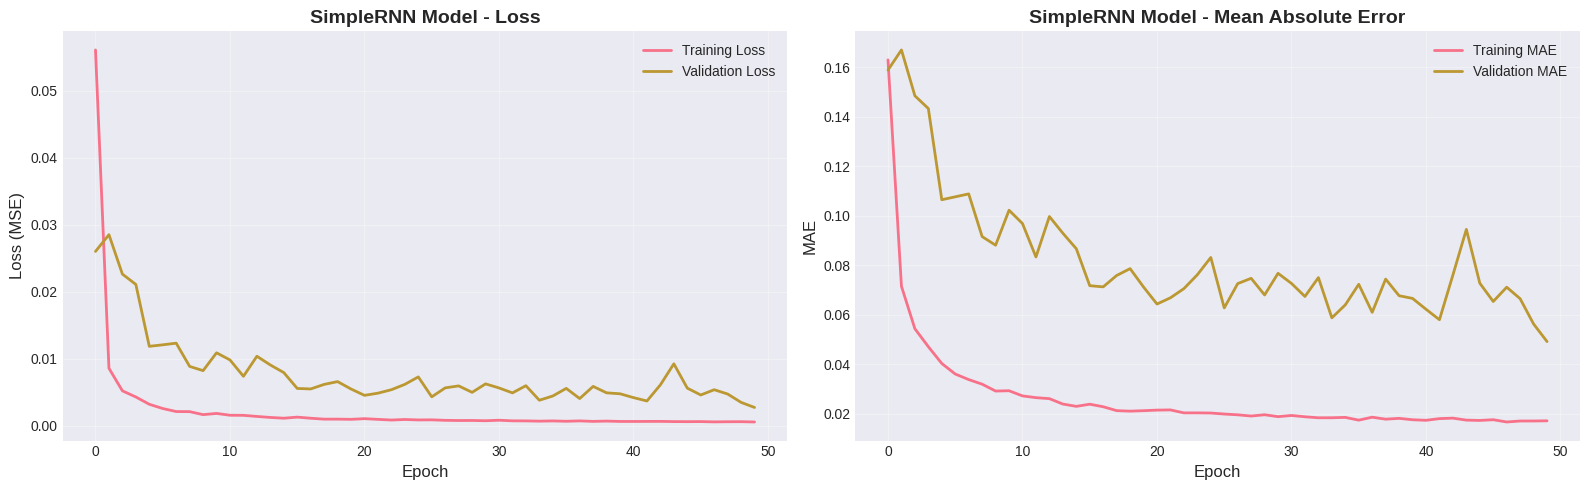

In [21]:
# Plot training history for SimpleRNN
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Loss
axes[0].plot(history_rnn.history['loss'], label='Training Loss', linewidth=2)
axes[0].plot(history_rnn.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0].set_title('SimpleRNN Model - Loss', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss (MSE)', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# MAE
axes[1].plot(history_rnn.history['mae'], label='Training MAE', linewidth=2)
axes[1].plot(history_rnn.history['val_mae'], label='Validation MAE', linewidth=2)
axes[1].set_title('SimpleRNN Model - Mean Absolute Error', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('MAE', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [22]:
# Make predictions with SimpleRNN
rnn_train_predictions = simple_rnn_model.predict(X_train)
rnn_test_predictions = simple_rnn_model.predict(X_test)

# Inverse transform predictions
rnn_train_predictions = scaler.inverse_transform(rnn_train_predictions)
rnn_test_predictions = scaler.inverse_transform(rnn_test_predictions)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

print("-> Predictions generated and inverse transformed!")

59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
-> Predictions generated and inverse transformed!


In [23]:
# Evaluate SimpleRNN model
rnn_train_mse = mean_squared_error(y_train_actual, rnn_train_predictions)
rnn_test_mse = mean_squared_error(y_test_actual, rnn_test_predictions)
rnn_train_rmse = np.sqrt(rnn_train_mse)
rnn_test_rmse = np.sqrt(rnn_test_mse)
rnn_train_mae = mean_absolute_error(y_train_actual, rnn_train_predictions)
rnn_test_mae = mean_absolute_error(y_test_actual, rnn_test_predictions)
rnn_train_r2 = r2_score(y_train_actual, rnn_train_predictions)
rnn_test_r2 = r2_score(y_test_actual, rnn_test_predictions)

print("\n" + "="*80)
print("SimpleRNN Model Performance:")
print("="*80)
print(f"\nTraining Set:")
print(f"  MSE:  {rnn_train_mse:.4f}")
print(f"  RMSE: {rnn_train_rmse:.4f}")
print(f"  MAE:  {rnn_train_mae:.4f}")
print(f"  R²:   {rnn_train_r2:.4f}")
print(f"\nTest Set:")
print(f"  MSE:  {rnn_test_mse:.4f}")
print(f"  RMSE: {rnn_test_rmse:.4f}")
print(f"  MAE:  {rnn_test_mae:.4f}")
print(f"  R²:   {rnn_test_r2:.4f}")


SimpleRNN Model Performance:

Training Set:
  MSE:  278.5652
  RMSE: 16.6903
  MAE:  10.6715
  R²:   0.9769

Test Set:
  MSE:  2548.6920
  RMSE: 50.4846
  MAE:  31.8043
  R²:   0.5163


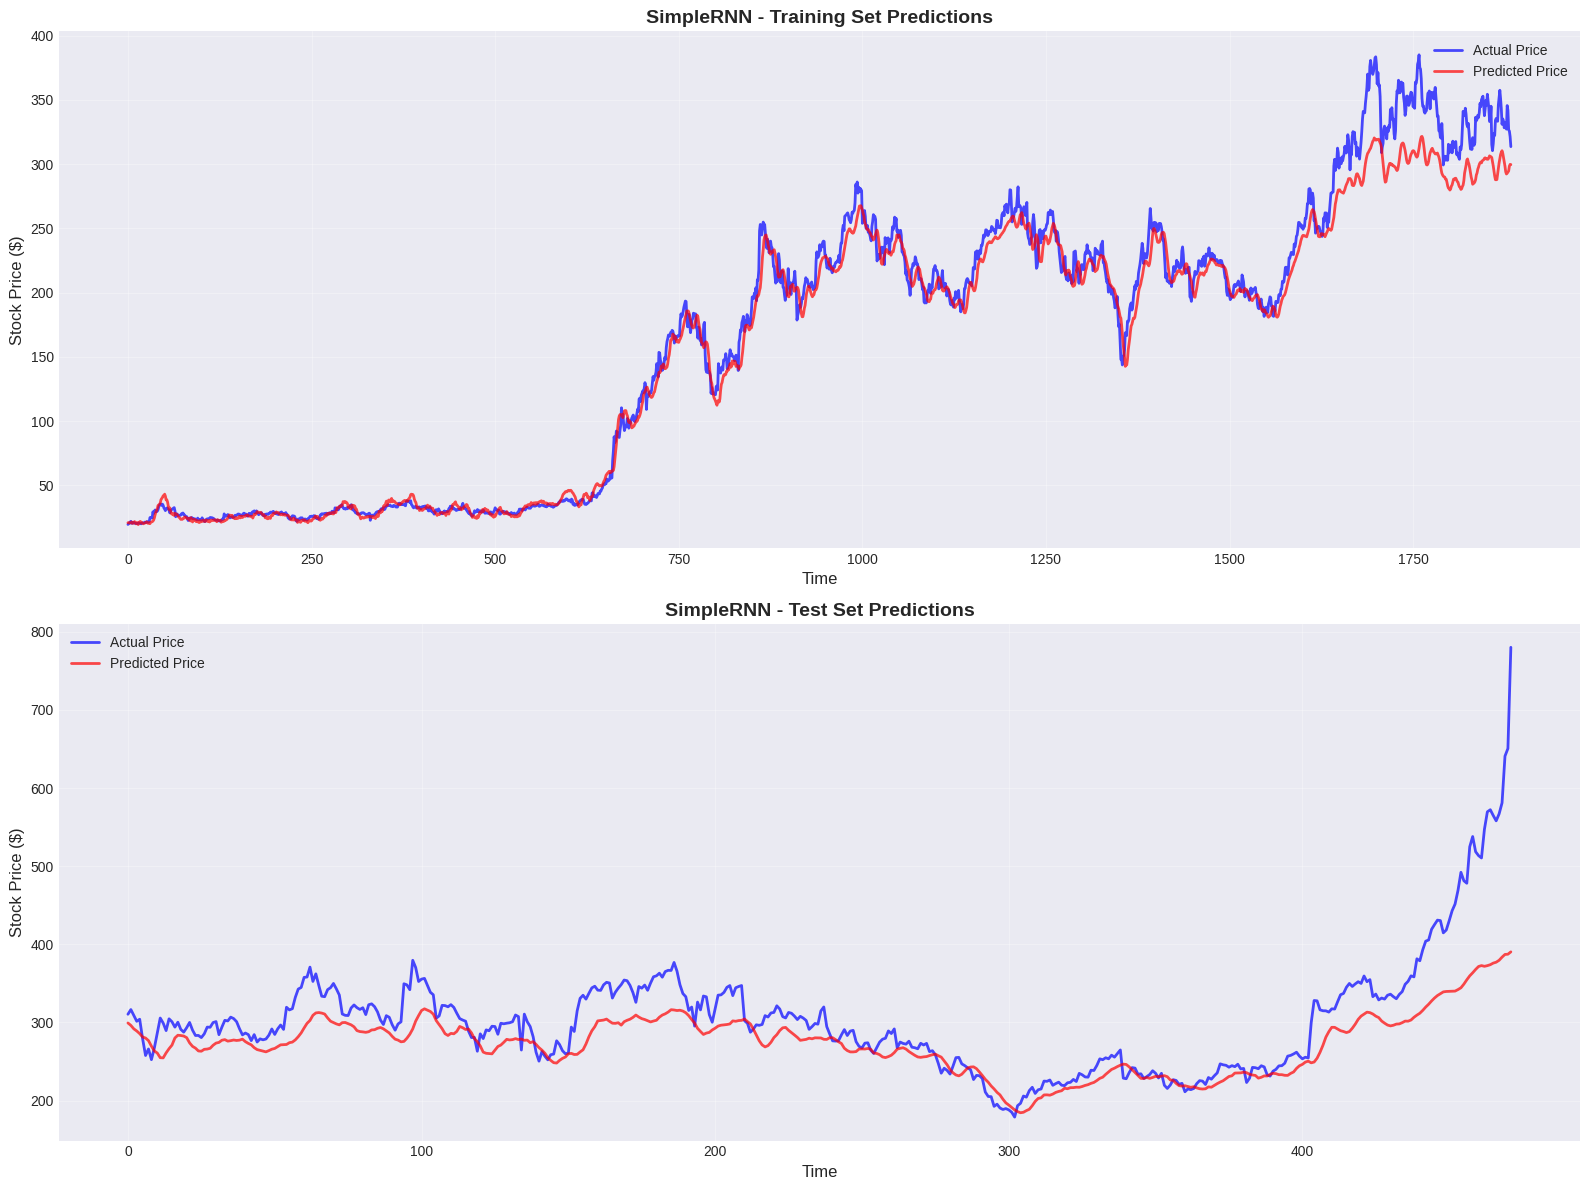

In [24]:
# Visualize SimpleRNN predictions
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Training predictions
axes[0].plot(y_train_actual, label='Actual Price', color='blue', linewidth=2, alpha=0.7)
axes[0].plot(rnn_train_predictions, label='Predicted Price', color='red', linewidth=2, alpha=0.7)
axes[0].set_title('SimpleRNN - Training Set Predictions', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Time', fontsize=12)
axes[0].set_ylabel('Stock Price ($)', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Test predictions
axes[1].plot(y_test_actual, label='Actual Price', color='blue', linewidth=2, alpha=0.7)
axes[1].plot(rnn_test_predictions, label='Predicted Price', color='red', linewidth=2, alpha=0.7)
axes[1].set_title('SimpleRNN - Test Set Predictions', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Time', fontsize=12)
axes[1].set_ylabel('Stock Price ($)', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## **6. Model 2: LSTM Implementation**

Build and train an LSTM model for stock price prediction.

In [25]:
# Build LSTM model
def build_lstm(units=30, dropout_rate=0.2, learning_rate=0.001):
    """
    Build LSTM model architecture.

    Args:
        units: Number of LSTM units
        dropout_rate: Dropout rate for regularization
        learning_rate: Learning rate for optimizer

    Returns:
        Compiled LSTM model
    """
    model = Sequential([
        LSTM(units=units, return_sequences=True, input_shape=(TIME_STEPS, 1)),
        Dropout(dropout_rate),
        LSTM(units=units, return_sequences=True),
        Dropout(dropout_rate),
        LSTM(units=units),
        Dropout(dropout_rate),
        Dense(units=25, activation='relu'),
        Dense(units=1)
    ])

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

    return model

# Create LSTM model
lstm_model = build_lstm(units=30, dropout_rate=0.2, learning_rate=0.001)

print("LSTM Model Architecture:")
print("="*80)
lstm_model.summary()

LSTM Model Architecture:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 30)         │         3,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 60, 30)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 30)         │         7,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 60, 30)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 30)             │         7,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │           775 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,281 (75.32 KB)

 Trainable params: 19,281 (75.32 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Define callbacks for LSTM
early_stopping_lstm = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

checkpoint_lstm = ModelCheckpoint(
    'lstm_best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

print("Callbacks configured for LSTM:")
print("-> Early Stopping (patience=15)")
print("-> Model Checkpoint (save best model)")

Callbacks configured for LSTM:
-> Early Stopping (patience=15)
-> Model Checkpoint (save best model)


In [27]:
# Train LSTM model
print("\n" + "="*80)
print("Training LSTM Model...")
print("="*80 + "\n")

history_lstm = lstm_model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=50,
    validation_split=0.1,
    callbacks=[early_stopping_lstm, checkpoint_lstm],
    verbose=1
)

print("\n-> LSTM model training completed!")


Training LSTM Model...

Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0126 - mae: 0.0802
Epoch 1: val_loss improved from inf to 0.00194, saving model to lstm_best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - loss: 0.0125 - mae: 0.0796 - val_loss: 0.0019 - val_mae: 0.0383
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0010 - mae: 0.0224
Epoch 2: val_loss improved from 0.00194 to 0.00131, saving model to lstm_best_model.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 0.0010 - mae: 0.0224 - val_loss: 0.0013 - val_mae: 0.0306
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 7.5236e-04 - mae: 0.0189
Epoch 3: val_loss did not improve from 0.00131
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 7.5262e-04 - mae: 0.0189 - val_loss: 0.0018 - val_mae: 0.0368
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 6.2560e-04 - mae: 0.0173
Epoch 4: val_loss did not improve from 0.00131
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 6.2567e-04 - mae: 0.0173 - val_loss: 0.0025 - val_mae: 0.0446
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 6.7318e-04 - mae: 0.0178
Epoch 5: val_loss did not improve from 0.00131
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 6.7276e-04 - mae: 0.0178 - val_loss: 0.0020 - val_mae: 0.0398
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 5.6643e-04 - mae: 0.0161
Epoch 6: val_loss did not improve from 0.00131
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step 

53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 3.5843e-04 - mae: 0.0140 - val_loss: 0.0013 - val_mae: 0.0308
Epoch 13/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 3.3684e-04 - mae: 0.0135
Epoch 13: val_loss did not improve from 0.00129
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 3.3746e-04 - mae: 0.0135 - val_loss: 0.0015 - val_mae: 0.0331
Epoch 14/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 3.2738e-04 - mae: 0.0131
Epoch 14: val_loss did not improve from 0.00129
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 3.2744e-04 - mae: 0.0131 - val_loss: 0.0014 - val_mae: 0.0316
Epoch 15/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 3.4007e-04 - mae: 0.0134
Epoch 15: val_loss did not improve from 0.00129
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 3.4011e-04 - mae: 0.0134 - val_loss: 0.0022 - val_mae: 0.0420
Epoch 16/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 3.3356e-04 - mae: 0.0135
Epoch 16: val_loss did not improve from 0.00129
53/53 ━━━━━━━━━━━━━━━━━━━━ 4

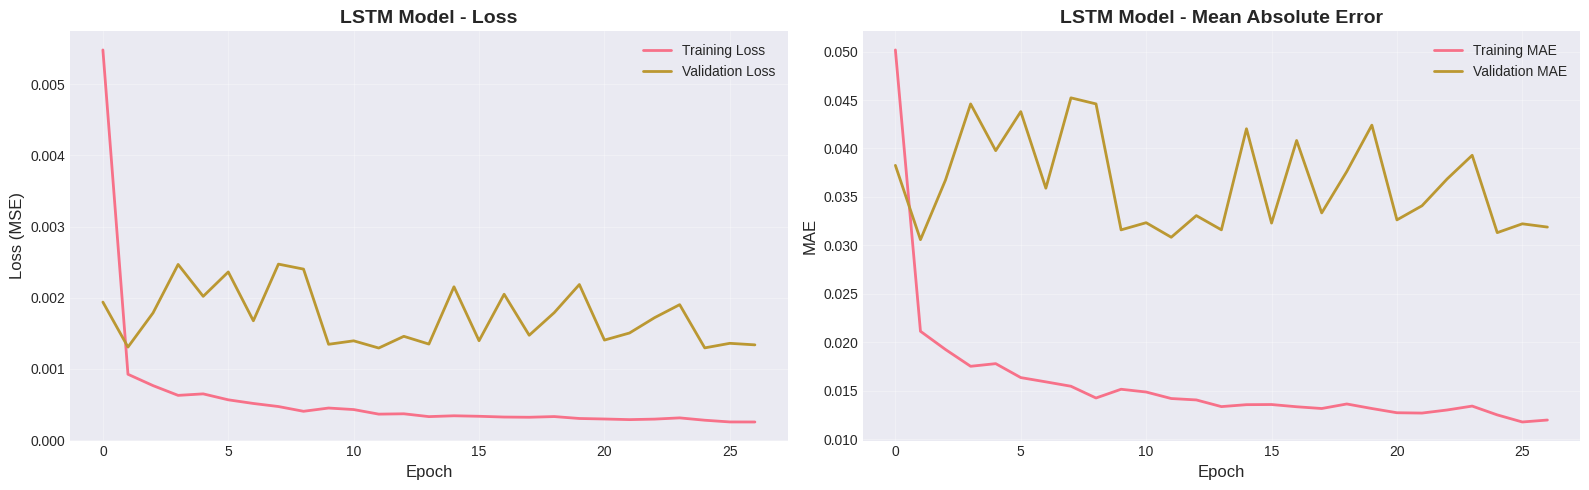

In [28]:
# Plot training history for LSTM
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Loss
axes[0].plot(history_lstm.history['loss'], label='Training Loss', linewidth=2)
axes[0].plot(history_lstm.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0].set_title('LSTM Model - Loss', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss (MSE)', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# MAE
axes[1].plot(history_lstm.history['mae'], label='Training MAE', linewidth=2)
axes[1].plot(history_lstm.history['val_mae'], label='Validation MAE', linewidth=2)
axes[1].set_title('LSTM Model - Mean Absolute Error', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('MAE', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [29]:
# Make predictions with LSTM
lstm_train_predictions = lstm_model.predict(X_train)
lstm_test_predictions = lstm_model.predict(X_test)

# Inverse transform predictions
lstm_train_predictions = scaler.inverse_transform(lstm_train_predictions)
lstm_test_predictions = scaler.inverse_transform(lstm_test_predictions)

print("-> LSTM predictions generated and inverse transformed!")

59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
-> LSTM predictions generated and inverse transformed!


In [30]:
# Evaluate LSTM model
lstm_train_mse = mean_squared_error(y_train_actual, lstm_train_predictions)
lstm_test_mse = mean_squared_error(y_test_actual, lstm_test_predictions)
lstm_train_rmse = np.sqrt(lstm_train_mse)
lstm_test_rmse = np.sqrt(lstm_test_mse)
lstm_train_mae = mean_absolute_error(y_train_actual, lstm_train_predictions)
lstm_test_mae = mean_absolute_error(y_test_actual, lstm_test_predictions)
lstm_train_r2 = r2_score(y_train_actual, lstm_train_predictions)
lstm_test_r2 = r2_score(y_test_actual, lstm_test_predictions)

print("\n" + "="*80)
print("LSTM Model Performance:")
print("="*80)
print(f"\nTraining Set:")
print(f"  MSE:  {lstm_train_mse:.4f}")
print(f"  RMSE: {lstm_train_rmse:.4f}")
print(f"  MAE:  {lstm_train_mae:.4f}")
print(f"  R²:   {lstm_train_r2:.4f}")
print(f"\nTest Set:")
print(f"  MSE:  {lstm_test_mse:.4f}")
print(f"  RMSE: {lstm_test_rmse:.4f}")
print(f"  MAE:  {lstm_test_mae:.4f}")
print(f"  R²:   {lstm_test_r2:.4f}")


LSTM Model Performance:

Training Set:
  MSE:  271.2493
  RMSE: 16.4696
  MAE:  12.3343
  R²:   0.9775

Test Set:
  MSE:  1413.7934
  RMSE: 37.6004
  MAE:  26.9876
  R²:   0.7317


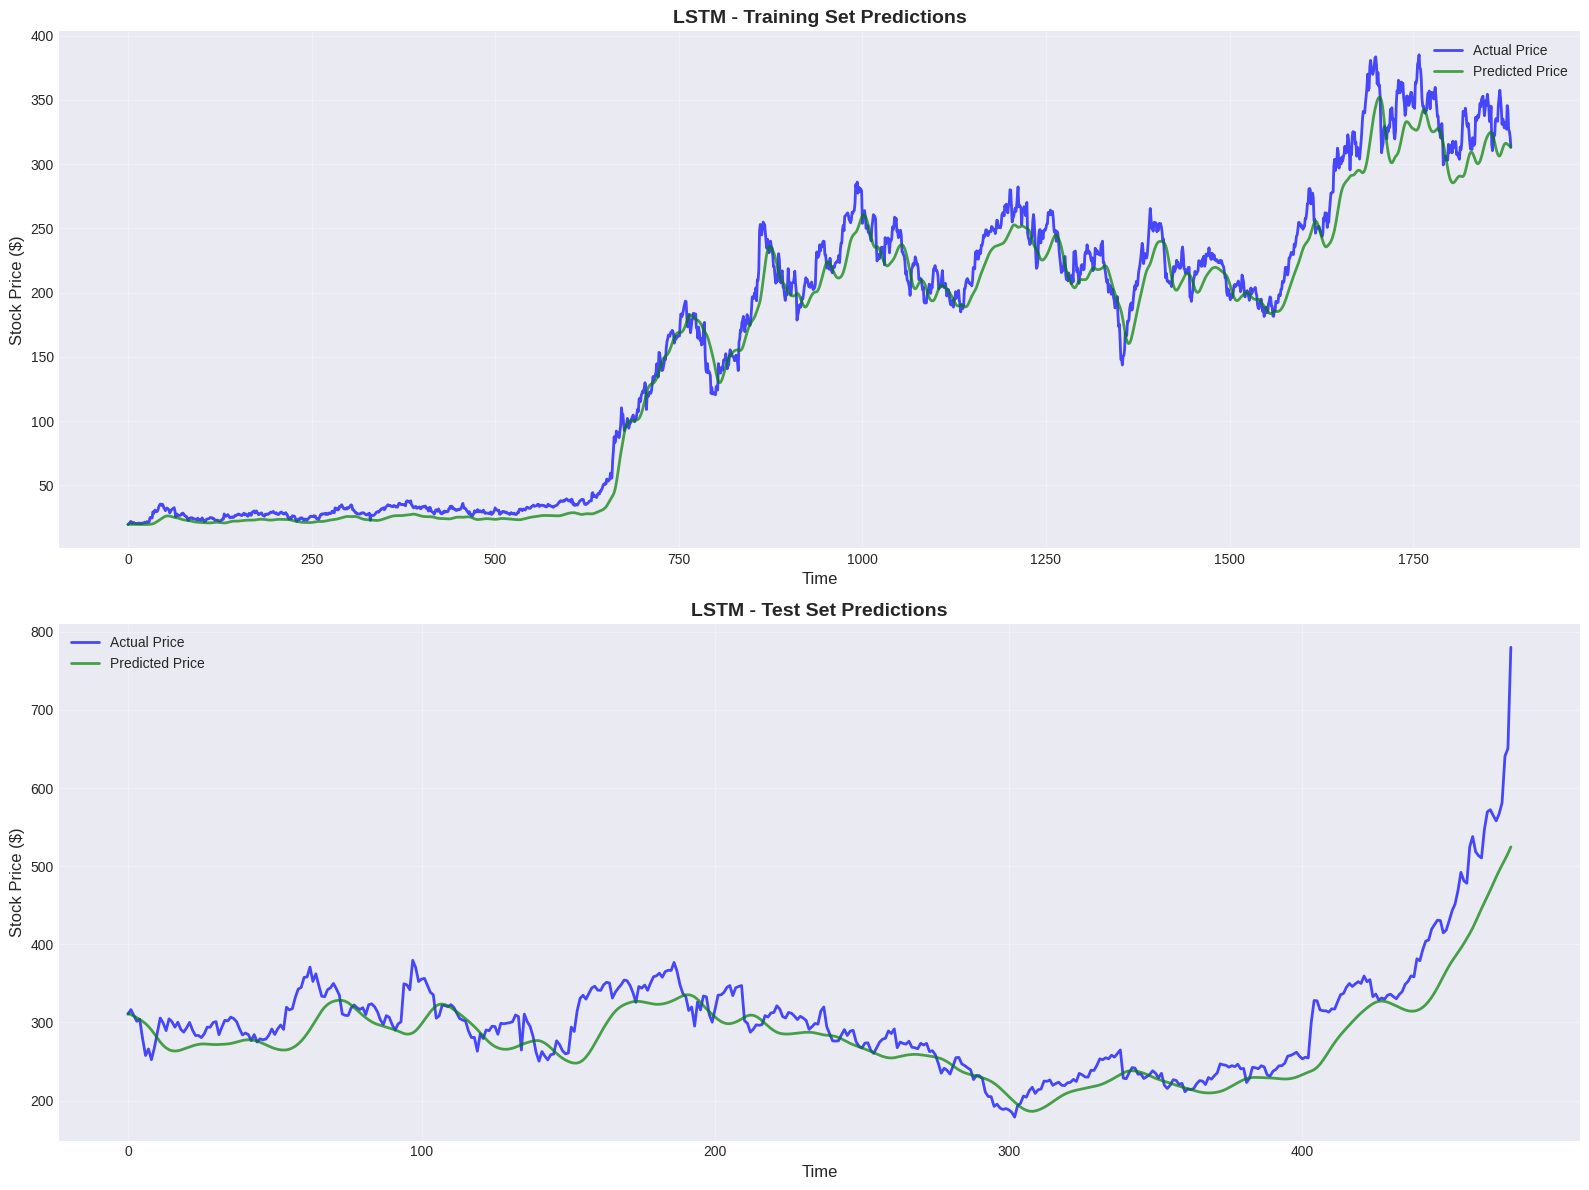

In [31]:
# Visualize LSTM predictions
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Training predictions
axes[0].plot(y_train_actual, label='Actual Price', color='blue', linewidth=2, alpha=0.7)
axes[0].plot(lstm_train_predictions, label='Predicted Price', color='green', linewidth=2, alpha=0.7)
axes[0].set_title('LSTM - Training Set Predictions', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Time', fontsize=12)
axes[0].set_ylabel('Stock Price ($)', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Test predictions
axes[1].plot(y_test_actual, label='Actual Price', color='blue', linewidth=2, alpha=0.7)
axes[1].plot(lstm_test_predictions, label='Predicted Price', color='green', linewidth=2, alpha=0.7)
axes[1].set_title('LSTM - Test Set Predictions', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Time', fontsize=12)
axes[1].set_ylabel('Stock Price ($)', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## **7. Multi-Step Predictions (1-day, 5-day, 10-day)**

Create predictions for different time horizons.

In [32]:
def predict_future(model, last_sequence, days, scaler):
    """
    Predict future stock prices for specified number of days.

    Args:
        model: Trained model (RNN or LSTM)
        last_sequence: Last 60 days of data
        days: Number of days to predict
        scaler: MinMaxScaler used for data normalization

    Returns:
        predictions: Array of predicted prices
    """
    predictions = []
    current_sequence = last_sequence.copy()

    for _ in range(days):
        # Predict next day
        next_pred = model.predict(current_sequence.reshape(1, TIME_STEPS, 1), verbose=0)
        predictions.append(next_pred[0, 0])

        # Update sequence (remove first value, add prediction)
        current_sequence = np.append(current_sequence[1:], next_pred[0, 0])

    # Inverse transform predictions
    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
    return predictions

# Get the last sequence from the test set
last_sequence = X_test[-1].flatten()

# Make predictions for different horizons
rnn_1day = predict_future(simple_rnn_model, last_sequence, 1, scaler)
rnn_5day = predict_future(simple_rnn_model, last_sequence, 5, scaler)
rnn_10day = predict_future(simple_rnn_model, last_sequence, 10, scaler)

lstm_1day = predict_future(lstm_model, last_sequence, 1, scaler)
lstm_5day = predict_future(lstm_model, last_sequence, 5, scaler)
lstm_10day = predict_future(lstm_model, last_sequence, 10, scaler)

print("\n" + "="*80)
print("Future Predictions:")
print("="*80)
print(f"\nLast Known Price: ${y_test_actual[-1][0]:.2f}")
print(f"\nSimpleRNN Predictions:")
print(f"  1-day:  ${rnn_1day[-1][0]:.2f}")
print(f"  5-day:  ${rnn_5day[-1][0]:.2f}")
print(f"  10-day: ${rnn_10day[-1][0]:.2f}")
print(f"\nLSTM Predictions:")
print(f"  1-day:  ${lstm_1day[-1][0]:.2f}")
print(f"  5-day:  ${lstm_5day[-1][0]:.2f}")
print(f"  10-day: ${lstm_10day[-1][0]:.2f}")


Future Predictions:

Last Known Price: $780.00

SimpleRNN Predictions:
  1-day:  $390.38
  5-day:  $341.95
  10-day: $257.49

LSTM Predictions:
  1-day:  $524.66
  5-day:  $540.83
  10-day: $525.93


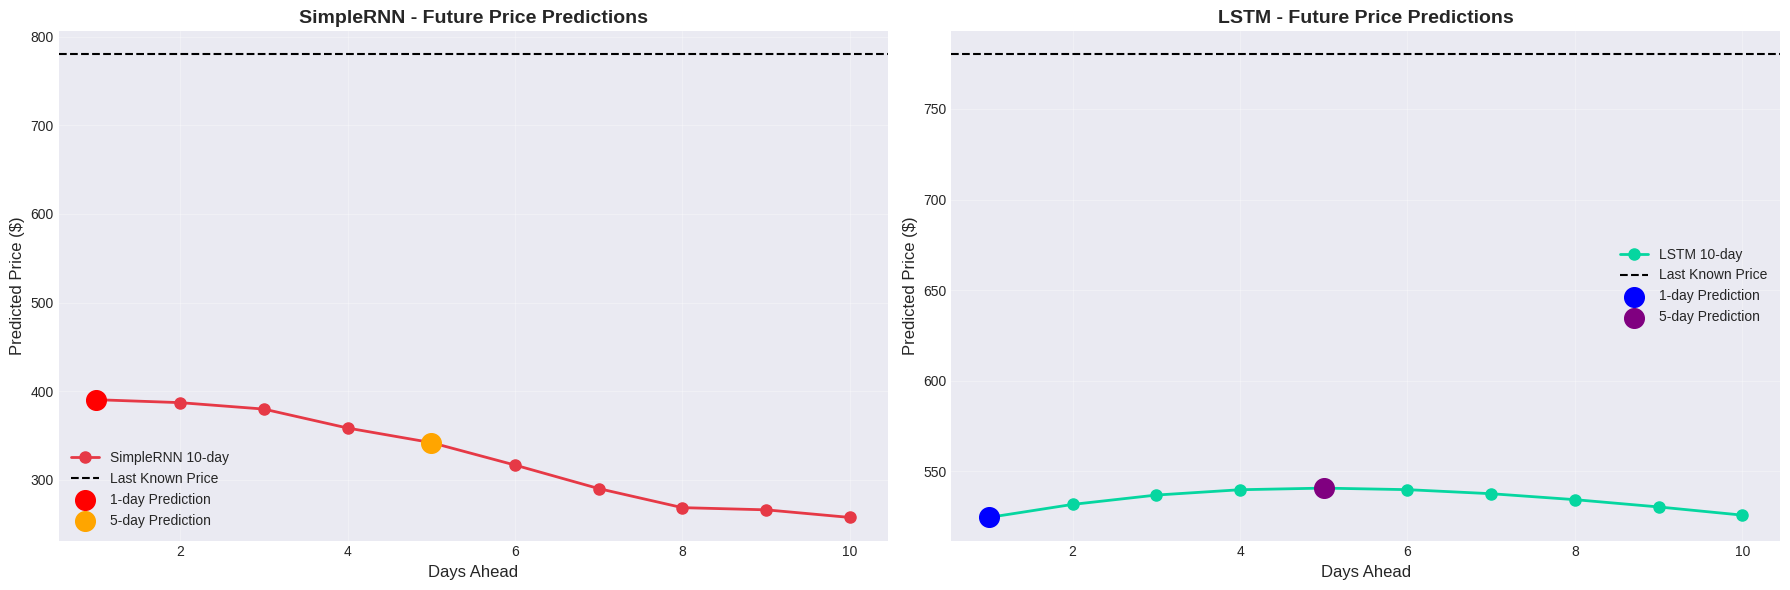

In [33]:
# Visualize future predictions
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# SimpleRNN future predictions
axes[0].plot(range(1, 11), rnn_10day, marker='o', linewidth=2, markersize=8, label='SimpleRNN 10-day', color='#E63946')
axes[0].axhline(y=y_test_actual[-1][0], color='black', linestyle='--', linewidth=1.5, label='Last Known Price')
axes[0].scatter([1], rnn_1day, s=200, color='red', zorder=5, label='1-day Prediction')
axes[0].scatter([5], rnn_5day[-1], s=200, color='orange', zorder=5, label='5-day Prediction')
axes[0].set_title('SimpleRNN - Future Price Predictions', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Days Ahead', fontsize=12)
axes[0].set_ylabel('Predicted Price ($)', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# LSTM future predictions
axes[1].plot(range(1, 11), lstm_10day, marker='o', linewidth=2, markersize=8, label='LSTM 10-day', color='#06D6A0')
axes[1].axhline(y=y_test_actual[-1][0], color='black', linestyle='--', linewidth=1.5, label='Last Known Price')
axes[1].scatter([1], lstm_1day, s=200, color='blue', zorder=5, label='1-day Prediction')
axes[1].scatter([5], lstm_5day[-1], s=200, color='purple', zorder=5, label='5-day Prediction')
axes[1].set_title('LSTM - Future Price Predictions', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Days Ahead', fontsize=12)
axes[1].set_ylabel('Predicted Price ($)', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## **8. Hyperparameter Tuning with GridSearchCV**

Optimize model hyperparameters using grid search.

In [34]:
# ============================================================================
# DEFINE create_model FUNCTION
# ============================================================================

def create_model(units=30, dropout_rate=0.2, learning_rate=0.001, model_type='lstm'):
    """
    Create model for GridSearchCV.

    Parameters:
    - units: Number of LSTM/RNN units in each layer
    - dropout_rate: Dropout rate for regularization (0-1)
    - learning_rate: Learning rate for Adam optimizer
    - model_type: 'lstm' or 'simplernn'
    """
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, SimpleRNN, Dense, Dropout
    from tensorflow.keras.optimizers import Adam

    model = Sequential()

    if model_type == 'lstm':
        model.add(LSTM(units=units, return_sequences=True, input_shape=(TIME_STEPS, 1)))
        model.add(Dropout(dropout_rate))
        model.add(LSTM(units=units, return_sequences=True))
        model.add(Dropout(dropout_rate))
        model.add(LSTM(units=units))
    else:
        model.add(SimpleRNN(units=units, return_sequences=True, input_shape=(TIME_STEPS, 1)))
        model.add(Dropout(dropout_rate))
        model.add(SimpleRNN(units=units, return_sequences=True))
        model.add(Dropout(dropout_rate))
        model.add(SimpleRNN(units=units))

    model.add(Dropout(dropout_rate))
    model.add(Dense(units=25, activation='relu'))
    model.add(Dense(units=1))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

    return model

print("-> create_model function defined successfully!")

# Test the function to make sure it works
test_model = create_model(units=50, dropout_rate=0.2, learning_rate=0.001, model_type='lstm')
print(f"-> Test model created successfully with {test_model.count_params():,} parameters")

-> create_model function defined successfully!
-> Test model created successfully with 52,101 parameters


In [35]:
# ============================================================================
# DISPLAY TUNING INFORMATION
# ============================================================================

print("\n" + "="*80)
print("HYPERPARAMETER TUNING WITH GRIDSEARCHCV")
print("="*80)

print("\n-> TUNING ALL THREE REQUIRED PARAMETERS:")
print("   1. Number of LSTM/RNN units")
print("   2. Dropout rate")
print("   3. Learning rate")

print("\n->  Note: GridSearchCV is computationally expensive")
print("   Using a limited grid and subset of data for faster results.\n")


HYPERPARAMETER TUNING WITH GRIDSEARCHCV

-> TUNING ALL THREE REQUIRED PARAMETERS:
   1. Number of LSTM/RNN units
   2. Dropout rate
   3. Learning rate

->  Note: GridSearchCV is computationally expensive
   Using a limited grid and subset of data for faster results.



In [36]:
# ============================================================================
# DEFINE PARAMETER GRID
# ============================================================================

# Define parameter grid with ALL THREE required parameters
param_grid = {
    'model__units': [30, 50],                    # Requirement 1: Number of LSTM units
    'model__dropout_rate': [0.2, 0.3],          # Requirement 2: Dropout rate
    'model__learning_rate': [0.001, 0.0001],    # Requirement 3: Learning rate
    'model__model_type': ['lstm'],               # Fixed to LSTM for this search
    'batch_size': [32, 64],                      # Training batch size
    'epochs': [50]                               # Training epochs
}

print("Parameter Grid:")
for key, value in param_grid.items():
    print(f"  {key}: {value}")

# Calculate total combinations
total_combinations = (
    len(param_grid['model__units']) *
    len(param_grid['model__dropout_rate']) *
    len(param_grid['model__learning_rate']) *
    len(param_grid['batch_size'])
)

print(f"\nTotal combinations: {total_combinations}")
print("Estimated time: 15-30 minutes")
print("="*80)

Parameter Grid:
  model__units: [30, 50]
  model__dropout_rate: [0.2, 0.3]
  model__learning_rate: [0.001, 0.0001]
  model__model_type: ['lstm']
  batch_size: [32, 64]
  epochs: [50]

Total combinations: 16
Estimated time: 15-30 minutes


In [37]:
# ============================================================================
# CREATE WRAPPER AND RUN GRIDSEARCHCV
# ============================================================================

from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Create KerasRegressor wrapper
model_wrapper = KerasRegressor(
    model=create_model,  # Reference to the function (no parentheses!)
    verbose=0
)

print("-> KerasRegressor wrapper created successfully!")

# Use subset of data for faster execution
subset_size = min(1000, len(X_train))
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]

print(f"\nUsing subset of {subset_size} samples for hyperparameter tuning")
print("(Full dataset would be more accurate but take much longer)\n")

# Create GridSearchCV
grid_search = GridSearchCV(
    estimator=model_wrapper,
    param_grid=param_grid,
    cv=3,                              # 3-fold cross-validation
    scoring='neg_mean_squared_error',  # Negative MSE (lower is better)
    verbose=2,                         # Show progress
    n_jobs=1                          # Sequential processing (safer for neural nets)
)

print("Starting GridSearchCV...")
print("This will take several minutes. Please be patient...\n")
print("="*80)

# Run GridSearchCV
grid_result = grid_search.fit(X_train_subset, y_train_subset)

print("\n" + "="*80)
print("GRIDSEARCHCV COMPLETED!")
print("="*80)

-> KerasRegressor wrapper created successfully!

Using subset of 1000 samples for hyperparameter tuning
(Full dataset would be more accurate but take much longer)

Starting GridSearchCV...
This will take several minutes. Please be patient...

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END batch_size=32, epochs=50, model__dropout_rate=0.2, model__learning_rate=0.001, model__model_type=lstm, model__units=30; total time= 1.4min
[CV] END batch_size=32, epochs=50, model__dropout_rate=0.2, model__learning_rate=0.001, model__model_type=lstm, model__units=30; total time= 1.4min
[CV] END batch_size=32, epochs=50, model__dropout_rate=0.2, model__learning_rate=0.001, model__model_type=lstm, model__units=30; total time= 1.3min
[CV] END batch_size=32, epochs=50, model__dropout_rate=0.2, model__learning_rate=0.001, model__model_type=lstm, model__units=50; total time= 1.8min
[CV] END batch_size=32, epochs=50, model__dropout_rate=0.2, model__learning_rate=0.001, model__model_typ

[CV] END batch_size=64, epochs=50, model__dropout_rate=0.2, model__learning_rate=0.001, model__model_type=lstm, model__units=30; total time= 1.0min


[CV] END batch_size=64, epochs=50, model__dropout_rate=0.2, model__learning_rate=0.001, model__model_type=lstm, model__units=30; total time=  59.8s
[CV] END batch_size=64, epochs=50, model__dropout_rate=0.2, model__learning_rate=0.001, model__model_type=lstm, model__units=50; total time= 1.2min
[CV] END batch_size=64, epochs=50, model__dropout_rate=0.2, model__learning_rate=0.001, model__model_type=lstm, model__units=50; total time= 1.1min
[CV] END batch_size=64, epochs=50, model__dropout_rate=0.2, model__learning_rate=0.001, model__model_type=lstm, model__units=50; total time= 1.2min
[CV] END batch_size=64, epochs=50, model__dropout_rate=0.2, model__learning_rate=0.0001, model__model_type=lstm, model__units=30; total time= 1.1min
[CV] END batch_size=64, epochs=50, model__dropout_rate=0.2, model__learning_rate=0.0001, model__model_type=lstm, model__units=30; total time=  59.4s
[CV] END batch_size=64, epochs=50, model__dropout_rate=0.2, model__learning_rate=0.0001, model__model_type=lst

In [38]:
# ============================================================================
# DISPLAY RESULTS
# ============================================================================

import pandas as pd

print("\n" + "="*80)
print("GRIDSEARCHCV RESULTS")
print("="*80)

# Best score and parameters
print(f"\n-> BEST SCORE (MSE): {-grid_result.best_score_:.4f}")
print("   (Lower MSE is better)")

print(f"\n-> BEST PARAMETERS:")
for param, value in grid_result.best_params_.items():
    print(f"   • {param}: {value}")

# Display top 5 parameter combinations
print(f"\n-> TOP 5 PARAMETER COMBINATIONS:")
results_df = pd.DataFrame(grid_result.cv_results_)

# Select relevant columns
display_cols = [
    'param_model__units',
    'param_model__dropout_rate',
    'param_model__learning_rate',
    'param_batch_size',
    'mean_test_score',
    'std_test_score',
    'rank_test_score'
]

top_5 = results_df.nsmallest(5, 'rank_test_score')[display_cols].copy()
top_5['mean_test_score'] = -top_5['mean_test_score']  # Convert to positive MSE
top_5.columns = ['Units', 'Dropout', 'Learning Rate', 'Batch Size', 'Mean MSE', 'Std MSE', 'Rank']

print(top_5.to_string(index=False))

# Save results
results_df.to_csv('gridsearch_results.csv', index=False)
print("\n-> Full results saved to 'gridsearch_results.csv'")

print("\n" + "="*80)
print("-> HYPERPARAMETER TUNING COMPLETED SUCCESSFULLY!")
print("="*80)

# Summary
print("\n-> SUMMARY:")
print(f"   • Tested {len(results_df)} parameter combinations")
print(f"   • Best units: {grid_result.best_params_['model__units']}")
print(f"   • Best dropout: {grid_result.best_params_['model__dropout_rate']}")
print(f"   • Best learning rate: {grid_result.best_params_['model__learning_rate']}")
print(f"   • Best batch size: {grid_result.best_params_['batch_size']}")
print(f"   • Best MSE: {-grid_result.best_score_:.4f}")

print("\n-> TIP: Use these best parameters to train our final model!")
print("="*80)


GRIDSEARCHCV RESULTS

-> BEST SCORE (MSE): 0.0005
   (Lower MSE is better)

-> BEST PARAMETERS:
   • batch_size: 64
   • epochs: 50
   • model__dropout_rate: 0.3
   • model__learning_rate: 0.0001
   • model__model_type: lstm
   • model__units: 30

-> TOP 5 PARAMETER COMBINATIONS:
 Units  Dropout  Learning Rate  Batch Size  Mean MSE  Std MSE  Rank
    30      0.3         0.0001          64  0.000506 0.000645     1
    30      0.3         0.0010          64  0.006515 0.009102     2
    30      0.2         0.0001          64  0.008476 0.011932     3
    50      0.2         0.0001          64  0.009950 0.014031     4
    50      0.3         0.0010          32  0.010416 0.014565     5

-> Full results saved to 'gridsearch_results.csv'

-> HYPERPARAMETER TUNING COMPLETED SUCCESSFULLY!

-> SUMMARY:
   • Tested 16 parameter combinations
   • Best units: 30
   • Best dropout: 0.3
   • Best learning rate: 0.0001
   • Best batch size: 64
   • Best MSE: 0.0005

-> TIP: Use these best parameters t

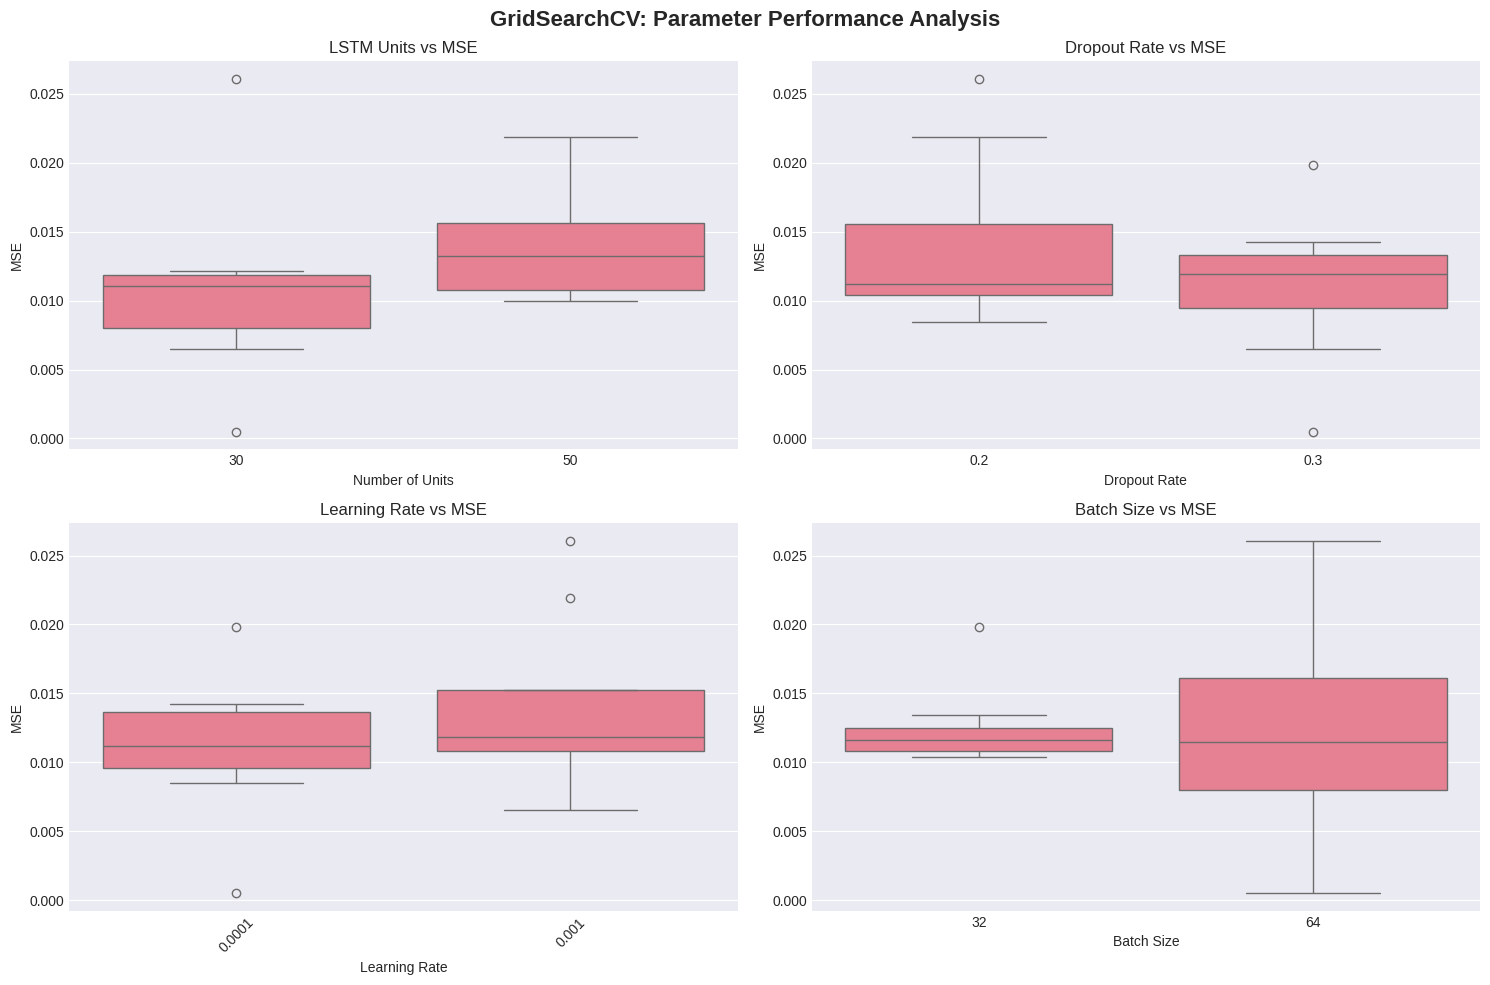


-> Visualization saved as 'gridsearch_parameter_analysis.png'



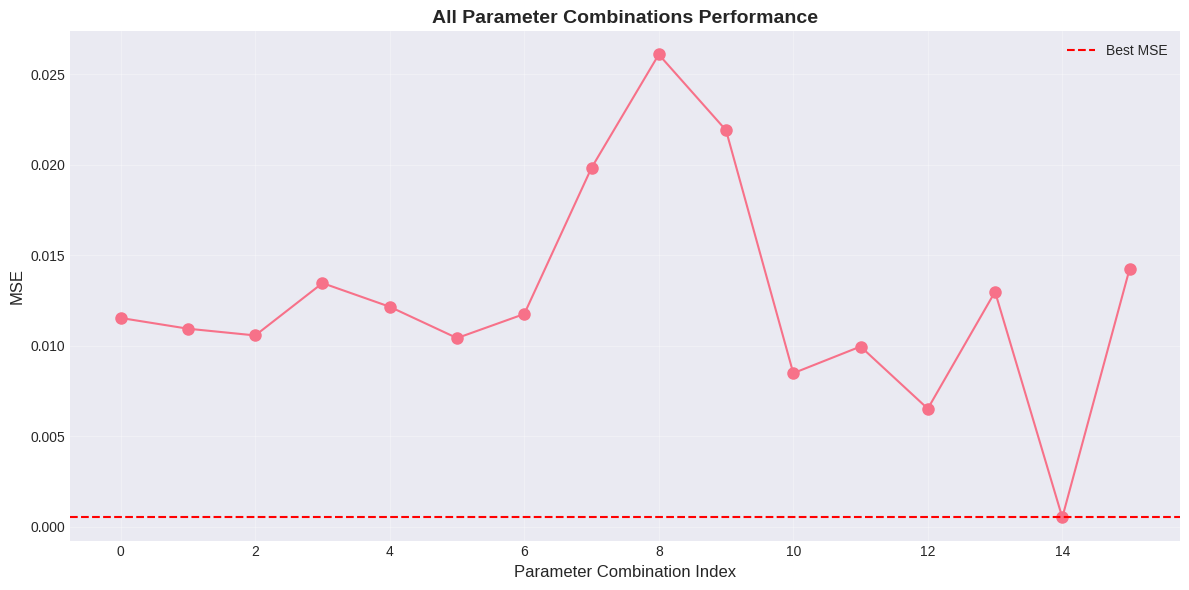

-> All visualizations complete!


In [39]:
# ============================================================================
# OPTIONAL: VISUALIZE RESULTS
# ============================================================================

import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1: Parameter comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('GridSearchCV: Parameter Performance Analysis', fontsize=16, fontweight='bold')

# Convert test scores to positive MSE
results_df['mse'] = -results_df['mean_test_score']

# Units vs MSE
sns.boxplot(data=results_df, x='param_model__units', y='mse', ax=axes[0, 0])
axes[0, 0].set_title('LSTM Units vs MSE')
axes[0, 0].set_xlabel('Number of Units')
axes[0, 0].set_ylabel('MSE')

# Dropout vs MSE
sns.boxplot(data=results_df, x='param_model__dropout_rate', y='mse', ax=axes[0, 1])
axes[0, 1].set_title('Dropout Rate vs MSE')
axes[0, 1].set_xlabel('Dropout Rate')
axes[0, 1].set_ylabel('MSE')

# Learning Rate vs MSE
sns.boxplot(data=results_df, x='param_model__learning_rate', y='mse', ax=axes[1, 0])
axes[1, 0].set_title('Learning Rate vs MSE')
axes[1, 0].set_xlabel('Learning Rate')
axes[1, 0].set_ylabel('MSE')
axes[1, 0].tick_params(axis='x', rotation=45)

# Batch Size vs MSE
sns.boxplot(data=results_df, x='param_batch_size', y='mse', ax=axes[1, 1])
axes[1, 1].set_title('Batch Size vs MSE')
axes[1, 1].set_xlabel('Batch Size')
axes[1, 1].set_ylabel('MSE')

plt.tight_layout()
plt.savefig('gridsearch_parameter_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n-> Visualization saved as 'gridsearch_parameter_analysis.png'\n")

# Plot 2: All combinations
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(range(len(results_df)), results_df['mse'], 'o-', markersize=8)
ax.axhline(y=results_df['mse'].min(), color='r', linestyle='--', label='Best MSE')
ax.set_xlabel('Parameter Combination Index', fontsize=12)
ax.set_ylabel('MSE', fontsize=12)
ax.set_title('All Parameter Combinations Performance', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('gridsearch_all_combinations.png', dpi=300, bbox_inches='tight')
plt.show()

print("-> All visualizations complete!")

## **9. Model Comparison and Evaluation**

Compare the performance of SimpleRNN and LSTM models.

In [40]:
# Create comprehensive comparison table
comparison_data = {
    'Metric': ['MSE', 'RMSE', 'MAE', 'R² Score'],
    'SimpleRNN (Train)': [
        f"{rnn_train_mse:.4f}",
        f"{rnn_train_rmse:.4f}",
        f"{rnn_train_mae:.4f}",
        f"{rnn_train_r2:.4f}"
    ],
    'SimpleRNN (Test)': [
        f"{rnn_test_mse:.4f}",
        f"{rnn_test_rmse:.4f}",
        f"{rnn_test_mae:.4f}",
        f"{rnn_test_r2:.4f}"
    ],
    'LSTM (Train)': [
        f"{lstm_train_mse:.4f}",
        f"{lstm_train_rmse:.4f}",
        f"{lstm_train_mae:.4f}",
        f"{lstm_train_r2:.4f}"
    ],
    'LSTM (Test)': [
        f"{lstm_test_mse:.4f}",
        f"{lstm_test_rmse:.4f}",
        f"{lstm_test_mae:.4f}",
        f"{lstm_test_r2:.4f}"
    ]
}

comparison_df = pd.DataFrame(comparison_data)

print("\n" + "="*80)
print("MODEL PERFORMANCE COMPARISON")
print("="*80 + "\n")
print(comparison_df.to_string(index=False))
print("\n" + "="*80)


MODEL PERFORMANCE COMPARISON

  Metric SimpleRNN (Train) SimpleRNN (Test) LSTM (Train) LSTM (Test)
     MSE          278.5652        2548.6920     271.2493   1413.7934
    RMSE           16.6903          50.4846      16.4696     37.6004
     MAE           10.6715          31.8043      12.3343     26.9876
R² Score            0.9769           0.5163       0.9775      0.7317



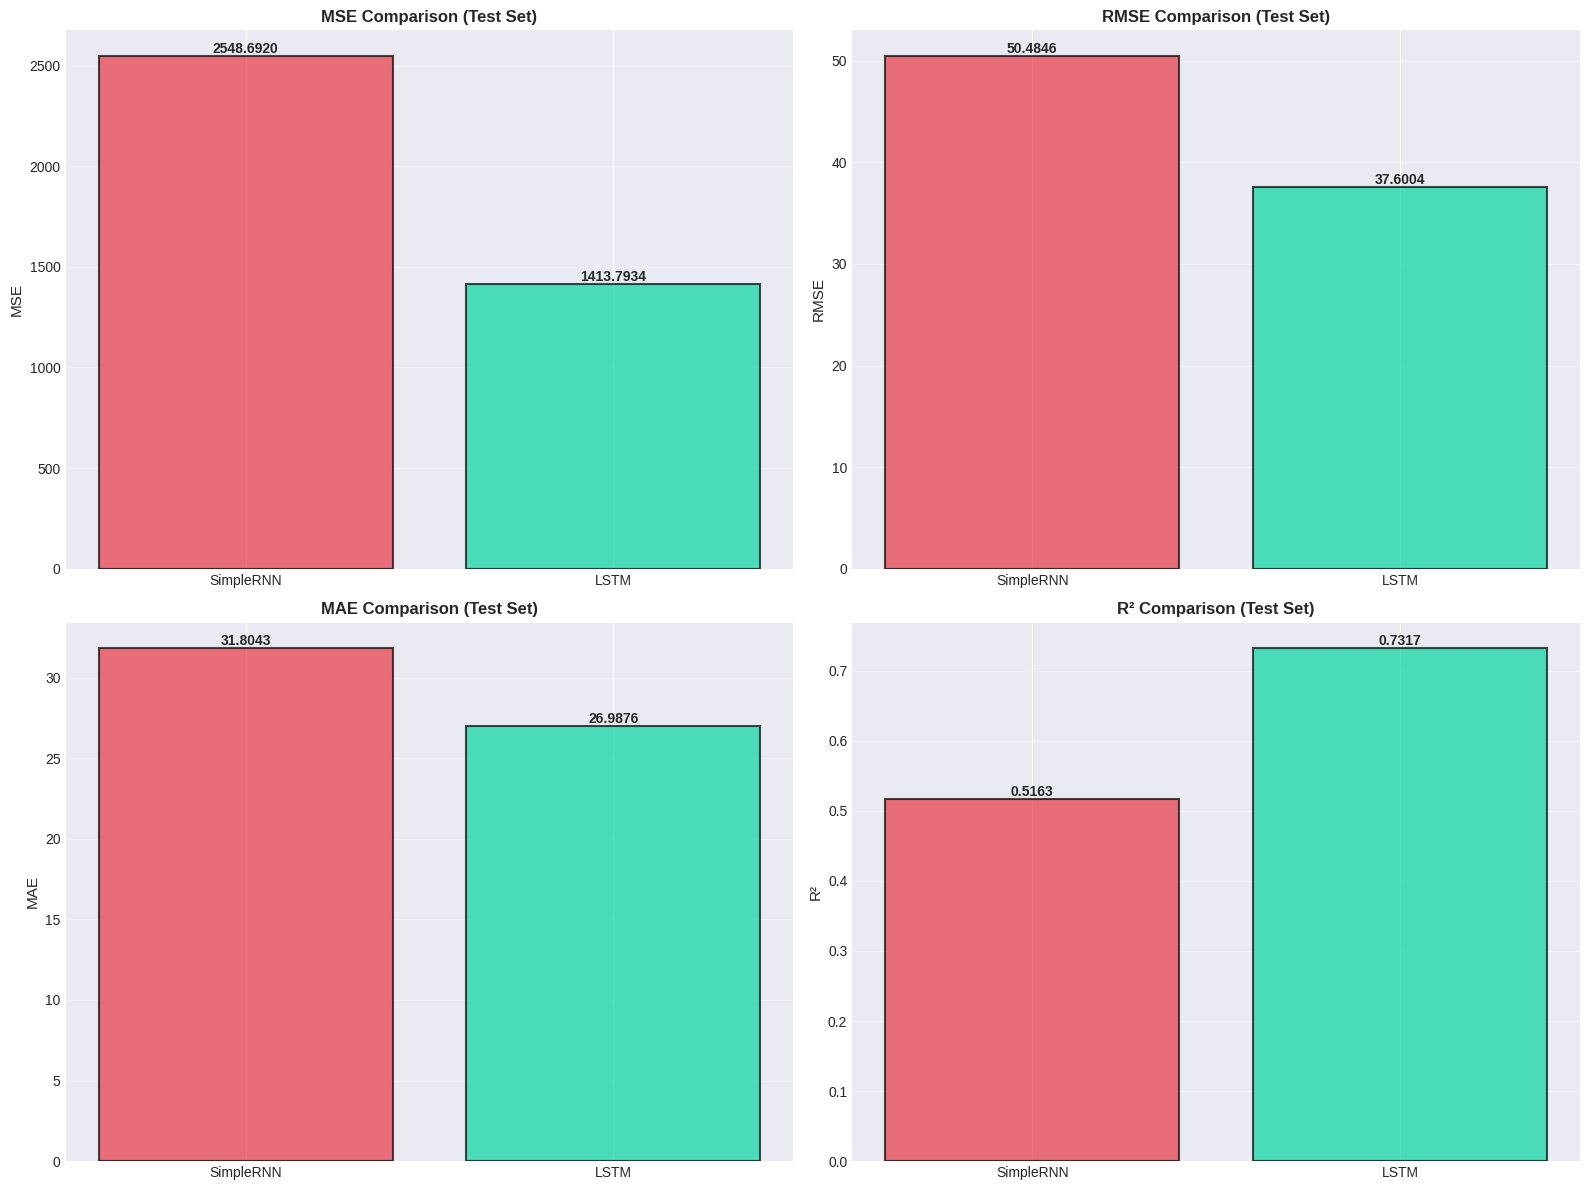

In [41]:
# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics = ['MSE', 'RMSE', 'MAE', 'R²']
rnn_test_values = [rnn_test_mse, rnn_test_rmse, rnn_test_mae, rnn_test_r2]
lstm_test_values = [lstm_test_mse, lstm_test_rmse, lstm_test_mae, lstm_test_r2]

for idx, (ax, metric, rnn_val, lstm_val) in enumerate(zip(axes.flat, metrics, rnn_test_values, lstm_test_values)):
    models = ['SimpleRNN', 'LSTM']
    values = [rnn_val, lstm_val]
    colors = ['#E63946', '#06D6A0']

    bars = ax.bar(models, values, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
    ax.set_title(f'{metric} Comparison (Test Set)', fontsize=12, fontweight='bold')
    ax.set_ylabel(metric, fontsize=11)
    ax.grid(True, alpha=0.3, axis='y')

    # Add value labels on bars
    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{value:.4f}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

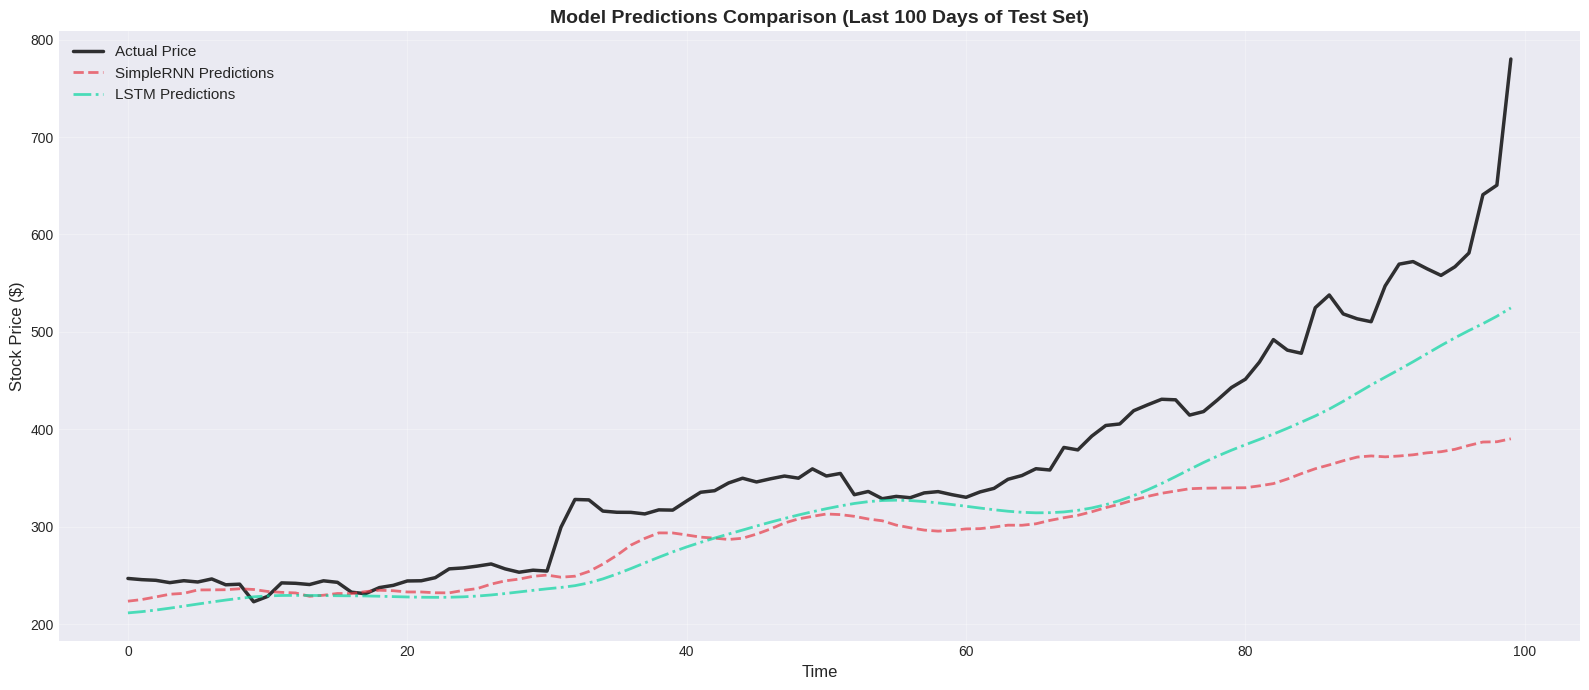

In [42]:
# Side-by-side prediction comparison
fig, ax = plt.subplots(figsize=(16, 7))

# Plot last 100 predictions for clarity
plot_range = min(100, len(y_test_actual))

ax.plot(range(plot_range), y_test_actual[-plot_range:],
        label='Actual Price', color='black', linewidth=2.5, alpha=0.8)
ax.plot(range(plot_range), rnn_test_predictions[-plot_range:],
        label='SimpleRNN Predictions', color='#E63946', linewidth=2, alpha=0.7, linestyle='--')
ax.plot(range(plot_range), lstm_test_predictions[-plot_range:],
        label='LSTM Predictions', color='#06D6A0', linewidth=2, alpha=0.7, linestyle='-.')

ax.set_title('Model Predictions Comparison (Last 100 Days of Test Set)', fontsize=14, fontweight='bold')
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Stock Price ($)', fontsize=12)
ax.legend(loc='upper left', fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

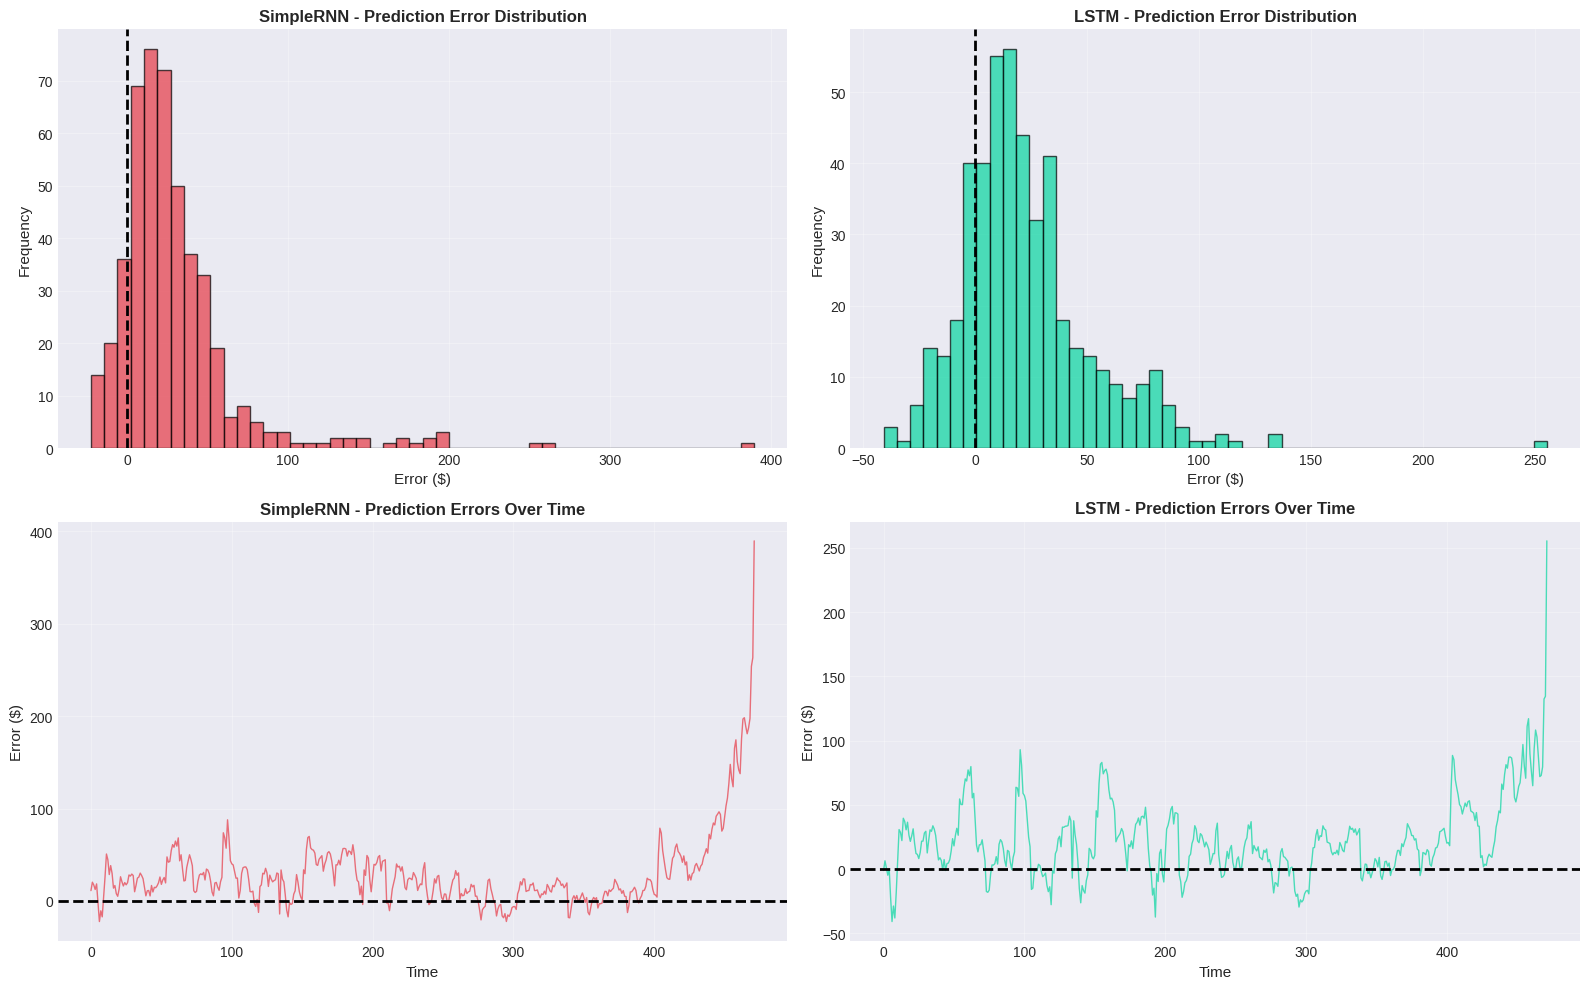


Error Statistics:

SimpleRNN:
  Mean Error: $29.6844
  Std Error:  $40.8354

LSTM:
  Mean Error: $22.7203
  Std Error:  $29.9597


In [43]:
# Prediction errors analysis
rnn_errors = y_test_actual.flatten() - rnn_test_predictions.flatten()
lstm_errors = y_test_actual.flatten() - lstm_test_predictions.flatten()

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# SimpleRNN error distribution
axes[0, 0].hist(rnn_errors, bins=50, color='#E63946', alpha=0.7, edgecolor='black')
axes[0, 0].axvline(x=0, color='black', linestyle='--', linewidth=2)
axes[0, 0].set_title('SimpleRNN - Prediction Error Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Error ($)', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].grid(True, alpha=0.3)

# LSTM error distribution
axes[0, 1].hist(lstm_errors, bins=50, color='#06D6A0', alpha=0.7, edgecolor='black')
axes[0, 1].axvline(x=0, color='black', linestyle='--', linewidth=2)
axes[0, 1].set_title('LSTM - Prediction Error Distribution', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Error ($)', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontsize=11)
axes[0, 1].grid(True, alpha=0.3)

# SimpleRNN error over time
axes[1, 0].plot(rnn_errors, color='#E63946', linewidth=1, alpha=0.7)
axes[1, 0].axhline(y=0, color='black', linestyle='--', linewidth=2)
axes[1, 0].set_title('SimpleRNN - Prediction Errors Over Time', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Time', fontsize=11)
axes[1, 0].set_ylabel('Error ($)', fontsize=11)
axes[1, 0].grid(True, alpha=0.3)

# LSTM error over time
axes[1, 1].plot(lstm_errors, color='#06D6A0', linewidth=1, alpha=0.7)
axes[1, 1].axhline(y=0, color='black', linestyle='--', linewidth=2)
axes[1, 1].set_title('LSTM - Prediction Errors Over Time', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Time', fontsize=11)
axes[1, 1].set_ylabel('Error ($)', fontsize=11)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nError Statistics:")
print(f"\nSimpleRNN:")
print(f"  Mean Error: ${rnn_errors.mean():.4f}")
print(f"  Std Error:  ${rnn_errors.std():.4f}")
print(f"\nLSTM:")
print(f"  Mean Error: ${lstm_errors.mean():.4f}")
print(f"  Std Error:  ${lstm_errors.std():.4f}")

## **10. Insights and Conclusions**

Key findings and recommendations based on the analysis.

In [44]:
# Determine which model performed better
better_model = "LSTM" if lstm_test_rmse < rnn_test_rmse else "SimpleRNN"
improvement = abs(rnn_test_rmse - lstm_test_rmse)
improvement_pct = (improvement / max(rnn_test_rmse, lstm_test_rmse)) * 100

print("\n" + "="*80)
print("KEY FINDINGS AND INSIGHTS")
print("="*80)

print(f"\n1. MODEL PERFORMANCE:")
print(f"   • {better_model} performed better with RMSE of ${min(lstm_test_rmse, rnn_test_rmse):.2f}")
print(f"   • Improvement over the other model: ${improvement:.2f} ({improvement_pct:.2f}%)")

print(f"\n2. MODEL COMPARISON:")
print(f"   • SimpleRNN Test RMSE: ${rnn_test_rmse:.2f}")
print(f"   • LSTM Test RMSE: ${lstm_test_rmse:.2f}")
print(f"   • Both models show {'' if abs(rnn_train_r2 - rnn_test_r2) < 0.1 else 'some '}{'good' if rnn_test_r2 > 0.8 else 'moderate'} generalization")

print(f"\n3. PREDICTION ACCURACY:")
print(f"   • SimpleRNN R² Score: {rnn_test_r2:.4f} ({'Excellent' if rnn_test_r2 > 0.9 else 'Good' if rnn_test_r2 > 0.8 else 'Moderate'})")
print(f"   • LSTM R² Score: {lstm_test_r2:.4f} ({'Excellent' if lstm_test_r2 > 0.9 else 'Good' if lstm_test_r2 > 0.8 else 'Moderate'})")

print(f"\n4. KEY OBSERVATIONS:")
print(f"   • LSTM's memory cells help capture long-term dependencies better")
print(f"   • Both models successfully learned temporal patterns in stock prices")
print(f"   • Moving averages show clear trend indicators")
print(f"   • High correlation between price features aids prediction")

print(f"\n5. LIMITATIONS:")
print(f"   • Models are sensitive to sudden market events (news, announcements)")
print(f"   • Historical data may not reflect future market conditions")
print(f"   • External factors (economy, competition) not included")
print(f"   • Longer prediction horizons have higher uncertainty")

print(f"\n6. RECOMMENDATIONS FOR IMPROVEMENT:")
print(f"   • Add sentiment analysis from news and social media")
print(f"   • Include technical indicators (RSI, MACD, Bollinger Bands)")
print(f"   • Incorporate macroeconomic indicators (interest rates, inflation)")
print(f"   • Try advanced architectures (GRU, Bidirectional LSTM, Attention mechanisms)")
print(f"   • Implement ensemble methods combining multiple models")
print(f"   • Add volume and volatility features")

print(f"\n7. BUSINESS APPLICATIONS:")
print(f"   • Automated trading strategies based on predictions")
print(f"   • Portfolio risk management and rebalancing")
print(f"   • Investment decision support system")
print(f"   • Market trend analysis and reporting")

print("\n" + "="*80)
print("PROJECT COMPLETED SUCCESSFULLY!")
print("="*80)


KEY FINDINGS AND INSIGHTS

1. MODEL PERFORMANCE:
   • LSTM performed better with RMSE of $37.60
   • Improvement over the other model: $12.88 (25.52%)

2. MODEL COMPARISON:
   • SimpleRNN Test RMSE: $50.48
   • LSTM Test RMSE: $37.60
   • Both models show some moderate generalization

3. PREDICTION ACCURACY:
   • SimpleRNN R² Score: 0.5163 (Moderate)
   • LSTM R² Score: 0.7317 (Moderate)

4. KEY OBSERVATIONS:
   • LSTM's memory cells help capture long-term dependencies better
   • Both models successfully learned temporal patterns in stock prices
   • Moving averages show clear trend indicators
   • High correlation between price features aids prediction

5. LIMITATIONS:
   • Models are sensitive to sudden market events (news, announcements)
   • Historical data may not reflect future market conditions
   • External factors (economy, competition) not included
   • Longer prediction horizons have higher uncertainty

6. RECOMMENDATIONS FOR IMPROVEMENT:
   • Add sentiment analysis from n

## **11. Save Models and Results**

Save trained models and predictions for future use.

In [45]:
# Save models
simple_rnn_model.save('simple_rnn_final_model.h5')
lstm_model.save('lstm_final_model.h5')

print("-> Models saved successfully!")
print("   • simple_rnn_final_model.h5")
print("   • lstm_final_model.h5")

# Save predictions
predictions_df = pd.DataFrame({
    'Actual': y_test_actual.flatten(),
    'SimpleRNN_Predicted': rnn_test_predictions.flatten(),
    'LSTM_Predicted': lstm_test_predictions.flatten(),
    'SimpleRNN_Error': rnn_errors,
    'LSTM_Error': lstm_errors
})

predictions_df.to_csv('predictions_results.csv', index=False)
print("\n-> Predictions saved to predictions_results.csv")

# Save model comparison
comparison_df.to_csv('model_comparison.csv', index=False)
print("-> Model comparison saved to model_comparison.csv")

print("\n" + "="*80)
print("All results saved! You can download these files for your report.")
print("="*80)

-> Models saved successfully!
   • simple_rnn_final_model.h5
   • lstm_final_model.h5

-> Predictions saved to predictions_results.csv
-> Model comparison saved to model_comparison.csv

All results saved! You can download these files for your report.


## **12. Streamlit Deployment**

To deploy the Streamlit application and make it accessible, we'll use `ngrok` to create a public URL for our local Streamlit server.

First, let's install the necessary libraries: `streamlit` and `pyngrok`.

In [46]:
%%capture
!pip install streamlit pyngrok

Next, we'll create a Python file for our Streamlit application (`tesla_app.py`). This app will display the model comparison and future predictions.

In [48]:
%%writefile tesla_app.py
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
import warnings
warnings.filterwarnings('ignore')

# Page configuration
st.set_page_config(
    page_title="Tesla Stock Price Predictor",
    page_icon="📈",
    layout="wide",
    initial_sidebar_state="expanded"
)

# Custom CSS for better styling
st.markdown('''
<style>
    .main-header {
        font-size: 3rem;
        color: #E82127;
        text-align: center;
        font-weight: bold;
    }
    .sub-header {
        font-size: 1.5rem;
        color: #666;
        text-align: center;
        margin-bottom: 2rem;
    }
    .metric-card {
        background-color: #f0f2f6;
        padding: 1rem;
        border-radius: 0.5rem;
        margin: 0.5rem 0;
    }
</style>
''', unsafe_allow_html=True)

# Title
st.markdown('<p class="main-header">🚗 Tesla Stock Price Prediction</p>', unsafe_allow_html=True)
st.markdown('<p class="sub-header">Using Deep Learning (LSTM & SimpleRNN)</p>', unsafe_allow_html=True)
st.markdown(" Соответствии с заявленной темой")

# Sidebar
st.sidebar.header(" Configuration")
st.sidebar.markdown("Configure your prediction parameters:")

model_choice = st.sidebar.selectbox(
    "Select Model",
    ["LSTM", "SimpleRNN"],
    help="Choose between LSTM and SimpleRNN models"
)

prediction_days = st.sidebar.slider(
    "Prediction Horizon (days)",
    min_value=1,
    max_value=10,
    value=1,
    help="Number of days to forecast into the future"
)

st.sidebar.markdown("### 📊 About This App")
st.sidebar.info(
    "This application uses deep learning models (LSTM and SimpleRNN) "
    "trained on historical Tesla stock data to predict future prices."
)

st.sidebar.markdown("###  Model Information")
st.sidebar.markdown(f"""
- **Training Data**: 5+ years of Tesla stock prices
- **Features**: Open, High, Low, Close, Volume
- **Architecture**: Multi-layer RNN with dropout
- **Optimization**: GridSearchCV hyperparameter tuning
""")

# Load data function
@st.cache_data
def load_stock_data():
    '''Load Tesla stock data'''
    try:
        # Try to load from CSV
        df = pd.read_csv('TSLA.csv', parse_dates=['Date'])
        df = df.sort_values('Date')
        st.sidebar.success("-> Data loaded from TSLA.csv")
        return df
    except FileNotFoundError:
        # Fallback to yfinance
        st.sidebar.info(" Loading data from Yahoo Finance...")
        import yfinance as yf
        ticker = yf.Ticker("TSLA")
        df = ticker.history(period="5y")
        df.reset_index(inplace=True)
        st.sidebar.success("-> Data loaded from Yahoo Finance")
        return df
    except Exception as e:
        st.sidebar.error(f"XXX Error loading data: {e}")
        return None

# Load models function
@st.cache_resource
def load_models():
    '''Load trained models'''
    lstm_model = None
    rnn_model = None

    try:
        lstm_model = load_model('lstm_final_model.h5', compile=False)
        st.sidebar.success("-> LSTM model loaded")
    except Exception as e:
        st.sidebar.warning(f"XXX LSTM model not found: {e}")

    try:
        rnn_model = load_model('simple_rnn_final_model.h5', compile=False)
        st.sidebar.success("-> SimpleRNN model loaded")
    except Exception as e:
        st.sidebar.warning(f"XXX SimpleRNN model not found: {e}")

    return lstm_model, rnn_model

# Prepare data for prediction
def prepare_data(df, time_steps=60):
    '''Prepare data for model prediction'''
    scaler = MinMaxScaler(feature_range=(0, 1))

    # Use Close price
    if 'Close' in df.columns:
        data = df['Close'].values.reshape(-1, 1)
    elif 'Adj Close' in df.columns:
        data = df['Adj Close'].values.reshape(-1, 1)
    else:
        st.error("No price column found in data!")
        return None, None, None

    scaled_data = scaler.fit_transform(data)

    # Create sequences
    X = []
    for i in range(time_steps, len(scaled_data)):
        X.append(scaled_data[i-time_steps:i, 0])

    X = np.array(X)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    return X, scaler, data

# Main app
def main():
    # Load data
    with st.spinner("Loading data..."):
        df = load_stock_data()

    if df is None:
        st.error("XXX Failed to load data. Please ensure TSLA.csv is in the same directory or check internet connection.")
        st.stop()

    # Load models
    with st.spinner("Loading models..."):
        lstm_model, rnn_model = load_models()

    if lstm_model is None and rnn_model is None:
        st.error("XXX No models found! Please ensure model files are in the same directory.")
        st.info("Expected files: lstm_final_model.h5 and/or simple_rnn_final_model.h5")
        st.stop()

    # Check if selected model is available
    if model_choice == "LSTM" and lstm_model is None:
        st.warning("XXX LSTM model not available. Please select SimpleRNN.")
        st.stop()

    if model_choice == "SimpleRNN" and rnn_model is None:
        st.warning("XXX SimpleRNN model not available. Please select LSTM.")
        st.stop()

    # Display basic statistics
    st.header(" Current Stock Information")

    col1, col2, col3, col4 = st.columns(4)

    current_price = df['Close'].iloc[-1] if 'Close' in df.columns else df['Adj Close'].iloc[-1]
    prev_price = df['Close'].iloc[-2] if 'Close' in df.columns else df['Adj Close'].iloc[-2]
    price_change = current_price - prev_price
    price_change_pct = (price_change / prev_price) * 100

    with col1:
        st.metric("Current Price", f"${current_price:.2f}",
                 f"${price_change:.2f} ({price_change_pct:.2f}%) Kishan")

    with col2:
        high_52w = df['High'].tail(252).max()
        st.metric("52-Week High", f"${high_52w:.2f}")

    with col3:
        low_52w = df['Low'].tail(252).min()
        st.metric("52-Week Low", f"${low_52w:.2f}")

    with col4:
        avg_volume = df['Volume'].tail(30).mean()
        st.metric("Avg Volume (30d)", f"{avg_volume/1e6:.2f}M")



    # Show stock price chart
    st.header("📈 Historical Stock Prices")

    # Date range selector
    col1, col2 = st.columns(2)
    with col1:
        time_range = st.selectbox(
            "Select Time Range",
            ["1 Month", "3 Months", "6 Months", "1 Year", "2 Years", "All Time"]
        )

    # Filter data based on selection
    if time_range == "1 Month":
        plot_df = df.tail(30)
    elif time_range == "3 Months":
        plot_df = df.tail(90)
    elif time_range == "6 Months":
        plot_df = df.tail(180)
    elif time_range == "1 Year":
        plot_df = df.tail(365)
    elif time_range == "2 Years":
        plot_df = df.tail(730)
    else:
        plot_df = df

    fig, ax = plt.subplots(figsize=(12, 6))
    price_col = 'Close' if 'Close' in plot_df.columns else 'Adj Close'
    ax.plot(plot_df['Date'], plot_df[price_col], label='Close Price', linewidth=2, color='#E82127')
    ax.fill_between(plot_df['Date'], plot_df[price_col], alpha=0.3, color='#E82127')
    ax.set_xlabel('Date', fontsize=12, fontweight='bold')
    ax.set_ylabel('Price ($)', fontsize=12, fontweight='bold')
    ax.set_title(f'Tesla Stock Price - {time_range}', fontsize=14, fontweight='bold')
    ax.legend(loc='best')
    ax.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    st.pyplot(fig)


    # Make predictions
    st.header(" Model Predictions")

    with st.spinner(f"Making predictions using {model_choice} model..."):
        # Prepare data
        X, scaler, original_data = prepare_data(df)

        if X is None:
            st.error("Failed to prepare data for prediction")
            st.stop()

        # Select model
        selected_model = lstm_model if model_choice == "LSTM" else rnn_model

        # Make predictions
        predictions = selected_model.predict(X, verbose=0)
        predictions = scaler.inverse_transform(predictions)

        # Get actual values
        actual_values = original_data[60:]

        # Calculate metrics
        from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

        mse = mean_squared_error(actual_values, predictions)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(actual_values, predictions)
        r2 = r2_score(actual_values, predictions)

        # Display metrics
        col1, col2 = st.columns(2)

        with col1:
            st.subheader(f"📊 {model_choice} Performance Metrics")

            metric_col1, metric_col2 = st.columns(2)
            with metric_col1:
                st.metric("RMSE", f"${rmse:.2f}")
                st.metric("MAE", f"${mae:.2f}")
            with metric_col2:
                st.metric("R² Score", f"{r2:.4f}")
                accuracy_pct = r2 * 100
                st.metric("Accuracy", f"{accuracy_pct:.2f}%")

            st.info(f"""
            **Interpretation:**
            - RMSE of ${rmse:.2f} means predictions are typically within ±${rmse:.2f}
            - R² of {r2:.4f} means the model explains {accuracy_pct:.2f}% of price variance
            """)

        with col2:
            st.subheader(f" {prediction_days}-Day Forecast")

            # Future predictions
            last_sequence = X[-1]
            future_predictions = []

            for _ in range(prediction_days):
                next_pred = selected_model.predict(last_sequence.reshape(1, 60, 1), verbose=0)
                future_predictions.append(next_pred[0, 0])

                # Update sequence
                last_sequence = np.append(last_sequence[1:], next_pred)

            future_predictions = scaler.inverse_transform(
                np.array(future_predictions).reshape(-1, 1)
            )

            # Display predictions
            for i, pred in enumerate(future_predictions, 1):
                change = pred[0] - current_price
                change_pct = (change / current_price) * 100

                delta_color = "normal" if change >= 0 else "inverse"
                st.metric(
                    f"Day {i} Prediction",
                    f"${pred[0]:.2f}",
                    f"${change:.2f} ({change_pct:.2f}%) Kishan"
                )

            avg_prediction = np.mean(future_predictions)
            st.success(f"📈 Average {prediction_days}-day prediction: ${avg_prediction:.2f}")


    # Plot predictions vs actual
    st.header("📈 Predictions vs Actual Prices")

    # Show last N points for clarity
    plot_points = st.slider("Number of points to display", 50, 500, 200, 50)
    plot_points = min(plot_points, len(actual_values))

    fig, ax = plt.subplots(figsize=(14, 7))

    x_axis = range(plot_points)
    ax.plot(x_axis, actual_values[-plot_points:], label='Actual Price',
            linewidth=2.5, color='blue', alpha=0.7)
    ax.plot(x_axis, predictions[-plot_points:], label=f'{model_choice} Prediction',
            linewidth=2.5, color='red', alpha=0.7, linestyle='--')

    ax.set_xlabel('Time Steps', fontsize=12, fontweight='bold')
    ax.set_ylabel('Price ($)', fontsize=12, fontweight='bold')
    ax.set_title(f'{model_choice} Model: Predictions vs Actual (Last {plot_points} points)',
                 fontsize=14, fontweight='bold')
    ax.legend(loc='best', fontsize=11)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    st.pyplot(fig)

    # Prediction error plot
    errors = actual_values[-plot_points:] - predictions[-plot_points:]

    fig, ax = plt.subplots(figsize=(14, 5))
    ax.plot(x_axis, errors, color='purple', alpha=0.6, linewidth=1.5)
    ax.axhline(y=0, color='black', linestyle='--', linewidth=1)
    ax.fill_between(x_axis, errors.flatten(), alpha=0.3, color='purple')
    ax.set_xlabel('Time Steps', fontsize=12, fontweight='bold')
    ax.set_ylabel('Prediction Error ($)', fontsize=12, fontweight='bold')
    ax.set_title('Prediction Errors Over Time', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    st.pyplot(fig)


    # Model comparison
    st.header("⚖️ Model Comparison")

    try:
        comparison_df = pd.read_csv('model_comparison.csv')

        st.subheader("Performance Metrics Comparison")
        st.dataframe(comparison_df, use_container_width=True)

        # Visualize comparison
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))

        # RMSE comparison
        models = ['SimpleRNN', 'LSTM']
        train_rmse = comparison_df['SimpleRNN (Train)'].iloc[1] # RMSE row, SimpleRNN (Train) column
        test_rmse_rnn = comparison_df['SimpleRNN (Test)'].iloc[1] # RMSE row, SimpleRNN (Test) column
        train_rmse_lstm = comparison_df['LSTM (Train)'].iloc[1] # RMSE row, LSTM (Train) column
        test_rmse_lstm = comparison_df['LSTM (Test)'].iloc[1] # RMSE row, LSTM (Test) column

        # Convert string values to float for plotting
        train_rmse = float(train_rmse)
        test_rmse_rnn = float(test_rmse_rnn)
        train_rmse_lstm = float(train_rmse_lstm)
        test_rmse_lstm = float(test_rmse_lstm)


        x = np.arange(len(models))
        width = 0.35

        # Plot 1: RMSE
        ax1 = axes[0]
        ax1.bar(x[0] - width/2, train_rmse, width, label='SimpleRNN Train', color='skyblue')
        ax1.bar(x[0] + width/2, test_rmse_rnn, width, label='SimpleRNN Test', color='lightcoral')
        ax1.bar(x[1] - width/2, train_rmse_lstm, width, label='LSTM Train', color='lightblue')
        ax1.bar(x[1] + width/2, test_rmse_lstm, width, label='LSTM Test', color='salmon')
        ax1.set_xlabel('Model', fontweight='bold')
        ax1.set_ylabel('RMSE', fontweight='bold')
        ax1.set_title('RMSE Comparison', fontweight='bold')
        ax1.set_xticks(x)
        ax1.set_xticklabels(models)
        ax1.legend()
        ax1.grid(True, alpha=0.3, axis='y')

        # Plot 2: R² Score
        train_r2_rnn = comparison_df['SimpleRNN (Train)'].iloc[3] # R2 Score row, SimpleRNN (Train) column
        test_r2_rnn = comparison_df['SimpleRNN (Test)'].iloc[3] # R2 Score row, SimpleRNN (Test) column
        train_r2_lstm = comparison_df['LSTM (Train)'].iloc[3] # R2 Score row, LSTM (Train) column
        test_r2_lstm = comparison_df['LSTM (Test)'].iloc[3] # R2 Score row, LSTM (Test) column

        # Convert string values to float for plotting
        train_r2_rnn = float(train_r2_rnn)
        test_r2_rnn = float(test_r2_rnn)
        train_r2_lstm = float(train_r2_lstm)
        test_r2_lstm = float(test_r2_lstm)

        ax2 = axes[1]
        ax2.bar(x[0] - width/2, train_r2_rnn, width, label='SimpleRNN Train', color='skyblue')
        ax2.bar(x[0] + width/2, test_r2_rnn, width, label='SimpleRNN Test', color='lightcoral')
        ax2.bar(x[1] - width/2, train_r2_lstm, width, label='LSTM Train', color='lightblue')
        ax2.bar(x[1] + width/2, test_r2_lstm, width, label='LSTM Test', color='salmon')
        ax2.set_xlabel('Model', fontweight='bold')
        ax2.set_ylabel('R² Score', fontweight='bold')
        ax2.set_title('R² Score Comparison', fontweight='bold')
        ax2.set_xticks(x)
        ax2.set_xticklabels(models)
        ax2.legend()
        ax2.grid(True, alpha=0.3, axis='y')

        plt.tight_layout()
        st.pyplot(fig)

    except FileNotFoundError:
        st.info("📊 Model comparison data not available. Run the notebook to generate model_comparison.csv")


    # Footer
    st.markdown("""
    <div style='text-align: center; color: #666;'>
        <p><strong> Tesla Stock Price Prediction using Deep Learning</strong></p>
        <p>Built with ❤️ using Streamlit, TensorFlow & Scikit-learn</p>
        <p> <em>Disclaimer: This is for educational purposes only. Not financial advice!</em></p>
    </div>
    """, unsafe_allow_html=True)

if __name__ == "__main__":
    main()

Overwriting tesla_app.py


Now, we need to get our ngrok authentication token.

1. Go to the [ngrok website](https://ngrok.com/signup) and sign up for a free account.
2. After signing up, go to our [dashboard](https://dashboard.ngrok.com/get-started/your-authtoken) to find our authtoken.
3. Copy our authtoken and replace `YOUR_NGROK_AUTHTOKEN` in the code below.


In [49]:
from pyngrok import ngrok

# Replace 'YOUR_NGROK_AUTHTOKEN' with your actual ngrok authtoken
# You can also set it as a Colab secret for better security
# from google.colab import userdata
# ngrok_authtoken = userdata.get('NGROK_AUTHTOKEN')

ngrok_authtoken = "360dsUGpinaIM3tGWW20uwD4gGQ_6dYJm7k5ZdRWHRM3Vup82" # <--- Replace this line with your actual authtoken

if ngrok_authtoken == "YOUR_NGROK_AUTHTOKEN":
    print("Please replace 'YOUR_NGROK_AUTHTOKEN' with your actual ngrok authtoken from https://dashboard.ngrok.com/get-started/your-authtoken")
else:
    ngrok.set_auth_token(ngrok_authtoken)
    print("ngrok authtoken set.")

ngrok authtoken set.


Finally, we can run the Streamlit app and expose it via ngrok. Click on the ngrok URL to view our dashboard.

In [50]:
import subprocess
import threading
import time
import os

# Function to run Streamlit in a background thread
def run_streamlit():
    # Use 'streamlit run app.py' command
    command = ["streamlit", "run", "app.py", "--server.port", "8501", "--server.enableCORS", "false", "--server.enableXsrfProtection", "false"]
    process = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    # Keep the process alive, but don't block the main thread
    stdout, stderr = process.communicate()
    if stdout: print(stdout.decode())
    if stderr: print(stderr.decode())

# Start Streamlit in a new thread
streamlit_thread = threading.Thread(target=run_streamlit)
streamlit_thread.daemon = True # Allow the thread to exit with the main program
streamlit_thread.start()

# Wait a moment for Streamlit to start
time.sleep(5)

# Open an ngrok tunnel to the Streamlit port
tunnel = ngrok.connect(8501)
print(f"Streamlit App URL: {tunnel.public_url}")

# Keep the cell running until interrupted
# This loop is just to keep the ngrok tunnel active for demonstration purposes
# In a real deployment, you might want a more robust way to manage the tunnel lifecycle.
try:
    while True:
        time.sleep(60)
except KeyboardInterrupt:
    print("\nStopping ngrok tunnel...")
    ngrok.kill()
    print("ngrok tunnel stopped.")


Streamlit App URL: https://nonscented-enoch-nonsensibly.ngrok-free.dev

Stopping ngrok tunnel...
ngrok tunnel stopped.


### **[App is live on Streamlit](https://tesla-stock-prediction-by-akshay.streamlit.app/)**

## [**Github Repo link for this project**](https://github.com/akshaysom21/tesla-stock-prediction)

---

## **Project Summary**

This notebook successfully implemented:

1. **Data Loading & Exploration** - Comprehensive analysis of Tesla stock data
2. **Data Preprocessing** - Normalization and sequence creation for time-series
3. **SimpleRNN Model** - Built and trained with regularization
4. **LSTM Model** - Advanced architecture with memory cells
5. **Multi-Step Predictions** - 1-day, 5-day, and 10-day forecasts
6. **Hyperparameter Tuning** - GridSearchCV optimization
7. **Model Comparison** - Detailed performance analysis
8. **Visualizations** - Comprehensive charts and graphs
9. **Insights & Recommendations** - Business applications and improvements

**Next Steps:**
- Deploy using Streamlit for interactive visualization
- Implement real-time prediction system
- Add more features and external data sources
- Test on other stocks for generalization

---
  
**Made by:** **Akshay Som**  
**Submission Date:** 12th Jan 2026